# Project Objectives:
1. **Analyse Usage and Demand Patterns:** Examine the extensive trip data available in Co-Wheels’ booking system (TripIQ) to identify patterns in vehicle usage and demand across different locations and times.
2. **Design and Develop a Pricing Model and Tool:**
     1. Create a pricing model that incorporates fixed and variable costs, including fuel and electricity, to determine optimal hourly and daily rates for different locations and times.
     2. Develop a straightforward tool that allows Co-Wheels to input various cost factors and receive tailored pricing options based on location, demand, and seasonal variations.   
4. **Evaluate Seasonal and Temporal Variations:** Assess the impact of seasonal changes and time-of-day variations on car-sharing demand and integrate these factors into the pricing model.
5. **Assess Profitability and Utilisation Impact:** Model potential outcomes of different pricing strategies to evaluate their impact on profitability and vehicle utilisation rates in various locations.
6. **Validate pricing tool:** Test the pricing tool with real-world data to ensure its accuracy and effectiveness in optimising Co-Wheels’ pricing strategy.

# 1. Loading libraries and data

In [1]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 711.2 kB/s eta 0:00:00


In [2]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
from scipy import stats
from matplotlib.ticker import FuncFormatter
from category_encoders import BinaryEncoder, OneHotEncoder
import joblib

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

# Ignore all warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

# Data location
DATA_PATH = "/content/drive/MyDrive/MSc Dissertation/data/"

Mounted at /content/drive


## 1.1. Load data

In [3]:
df = pd.read_csv(DATA_PATH + 'preprocessed_dataset.csv')
new_order = ['vehicle_description', 'vehicle_registration',	'location',	'booking_id', 'booking_actual_start', 'booking_actual_end',	'booking_actual_duration',
             'booking_billed_start', 'booking_billed_start_hour', 'booking_billed_start_dayofweek', 'booking_billed_start_month', 'booking_billed_start_year',
             'booking_billed_end', 'booking_billed_end_hour', 'booking_billed_end_dayofweek', 'booking_billed_end_month', 'booking_billed_end_year',
             'booking_billed_duration', 'booking_mileage', 'booking_rates_hours', 'booking_rates_24hours', 'booking_rates_overnight', 'booking_actual_cost_distance',
             'booking_actual_cost_time', 'booking_actual_cost_total', 'booking_created_at',	'booking_created_at_hour', 'booking_created_at_dayofweek',
             'booking_created_at_month', 'booking_created_at_year', 'season', 'is_holiday', 'Vehicle Type',	'Fuel Type', 'hourly_rate',	'daily_rate', 'per_mile']

df = df[new_order]

In [4]:
df.head()

vehicle_description vehicle_registration  \
0  RETIRED - White Toyota Aygo X-Play Nav (NL66 NKZ)             NL66 NKZ   
1                RETIRED - Renault Zoe EV (DL68 LNK)             DL68 LNK   
2  White Toyota Yaris Petrol Hybrid (Automatic) -...             ND19 HWY   
3      RETIRED - White Toyota Aygo X-Play (NL68 JVP)             NL68 JVP   
4  RETIRED - White Toyota Yaris Hybrid NJ68 JHV A...             NJ68 JHV   

  location                            booking_id booking_actual_start  \
0  Bristol  fc59ba9c-2ce9-11ea-8efc-bfa292f04054  2020-01-01 23:06:00   
1  Bristol  1cf7fae6-2ce7-11ea-a970-fbf7b3786523  2020-01-01 22:46:00   
2  Newbury  591b7a98-2cd8-11ea-a341-71665a42c0e8  2020-01-01 21:29:00   
3  Swindon  b6177928-2c55-11ea-a2e0-e9685b57c653  2020-01-01 21:22:00   
4  Horsham  9ffdc790-27ba-11ea-a36d-c540c1997f03  2020-01-01 22:02:00   

    booking_actual_end  booking_actual_duration booking_billed_start  \
0  2020-01-02 01:24:00                    138.0  2020-01-01 23:00:00   
1  2020-01-02 02:01:00                    195.0  2020-01-01 22:45:00   
2  2020-01-01 23:28:00                    119.0  2020-01-01 21:30:00   
3  2020-01-01 21:38:00                     16.0  2020-01-01 21:15:00   
4  2020-01-02 19:50:00                    733.0  2020-01-01 20:30:00   

   booking_billed_start_hour  booking_billed_start_dayofweek  \
0                         23                               2   
1                         22                               2   
2                         21                               2   
3                         21                               2   
4                         20                               2   

   booking_billed_start_month  booking_billed_start_year   booking_billed_end  \
0                           1                       2020  2020-01-02 08:00:00   
1                           1                       2020  2020-01-02 02:30:00   
2                           1                       2020  2020-01-01 23:30:00   
3                           1                       2020  2020-01-01 21:45:00   
4                           1                       2020  2020-01-02 20:30:00   

   booking_billed_end_hour  booking_billed_end_dayofweek  \
0                        8                             3   
1                        2                             3   
2                       23                             2   
3                       21                             2   
4                       20                             3   

   booking_billed_end_month  booking_billed_end_year  booking_billed_duration  \
0                         1                     2020                    540.0   
1                         1                     2020                    225.0   
2                         1                     2020                    120.0   
3                         1                     2020                     30.0   
4                         1                     2020                    915.0   

   booking_mileage  booking_rates_hours  booking_rates_24hours  \
0             82.0                  0.0                    0.0   
1              5.0                  0.0                    0.0   
2              6.0                  2.0                    0.0   
3              6.0                  0.5                    0.0   
4             53.0                  0.0                    1.0   

   booking_rates_overnight  booking_actual_cost_distance  \
0                      1.0                         14.76   
1                      1.0                          0.00   
2                      0.0                          1.08   
3                      0.0                          1.08   
4                      0.0                          9.54   

   booking_actual_cost_time  booking_actual_cost_total   booking_created_at  \
0                      9.50                      24.26  2020-01-01 22:56:00   
1                     11.00                      11.00  2020-0

# 2. Exploratory Data Analysis (EDA)

In [5]:
# Checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

No of Unique Values
vehicle_description                             916
vehicle_registration                            966
location                                         86
booking_id                                   378614
booking_actual_start                         331063
booking_actual_end                           337717
booking_actual_duration                         734
booking_billed_start                         116285
booking_billed_start_hour                        24
booking_billed_start_dayofweek                    7
booking_billed_start_month                       12
booking_billed_start_year                         7
booking_billed_end                           121532
booking_billed_end_hour                          24
booking_billed_end_dayofweek                      7
booking_billed_end_month                         12
booking_billed_end_year                           7
booking_billed_duration                          61
booking_mileage                                 111
booking_rates_hours                              32
booking_rates_24hours                            25
booking_rates_overnight                           2
booking_actual_cost_distance                    732
booking_actual_cost_time                        758
booking_actual_cost_total                      8160
booking_created_at                           339222
booking_created_at_hour                          24
booking_created_at_dayofweek                      7
booking_created_at_month                         12
booking_created_at_year                           7
season                                            4
is_holiday                                        2
Vehicle Type                                      5
Fuel Type                                         3
hourly_rate                                      18
daily_rate                                       15
per_mile                                         13

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378614 entries, 0 to 378613
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   vehicle_description             378614 non-null  object 
 1   vehicle_registration            378614 non-null  object 
 2   location                        378614 non-null  object 
 3   booking_id                      378614 non-null  object 
 4   booking_actual_start            378614 non-null  object 
 5   booking_actual_end              378614 non-null  object 
 6   booking_actual_duration         378614 non-null  float64
 7   booking_billed_start            378614 non-null  object 
 8   booking_billed_start_hour       378614 non-null  int64  
 9   booking_billed_start_dayofweek  378614 non-null  int64  
 10  booking_billed_start_month      378614 non-null  int64  
 11  booking_billed_start_year       378614 non-null  int64  
 12  booking_billed_e

In [7]:
# Checking null values in the dataset
df.isnull().sum()

vehicle_description               0
vehicle_registration              0
location                          0
booking_id                        0
booking_actual_start              0
booking_actual_end                0
booking_actual_duration           0
booking_billed_start              0
booking_billed_start_hour         0
booking_billed_start_dayofweek    0
booking_billed_start_month        0
booking_billed_start_year         0
booking_billed_end                0
booking_billed_end_hour           0
booking_billed_end_dayofweek      0
booking_billed_end_month          0
booking_billed_end_year           0
booking_billed_duration           0
booking_mileage                   0
booking_rates_hours               0
booking_rates_24hours             0
booking_rates_overnight           0
booking_actual_cost_distance      0
booking_actual_cost_time          0
booking_actual_cost_total         0
booking_created_at                0
booking_created_at_hour           0
booking_created_at_dayofweek      0
booking_created_at_month          0
booking_created_at_year           0
season                            0
is_holiday                        0
Vehicle Type                      0
Fuel Type                         0
hourly_rate                       0
daily_rate                        0
per_mile                          0
dtype: int64

# 3. Relationship between features

 There is a strong positive correlation between `booking_mileage` and `booking_actual_cost_distance`. This means that as the mileage of the booking increases, the cost associated with the distance also increases.

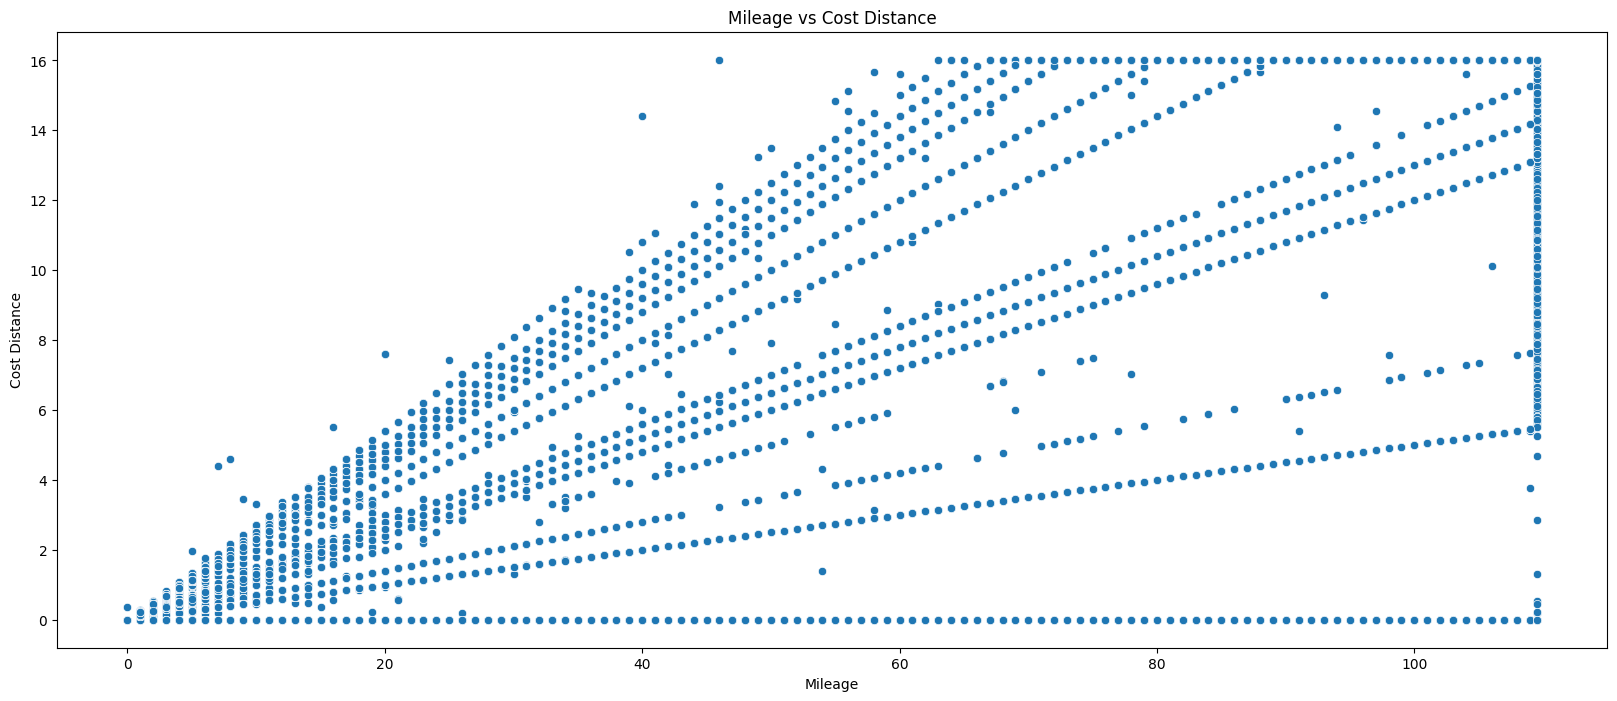

In [8]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x=df['booking_mileage'], y=df['booking_actual_cost_distance'])
plt.title('Mileage vs Cost Distance')
plt.xlabel('Mileage')
plt.ylabel('Cost Distance')
plt.show()

There is a clear positive correlation between `Actual Cost Time` and `Actual Cost Total`. This indicates that as the cost associated with time increases, the total cost also increases. **It is evident that Total Cost is heavily influenced by Cost Time. Therefore, it is recommended to adjust the prices for hourly_rate and daily_rate to maximize our overall revenues.**

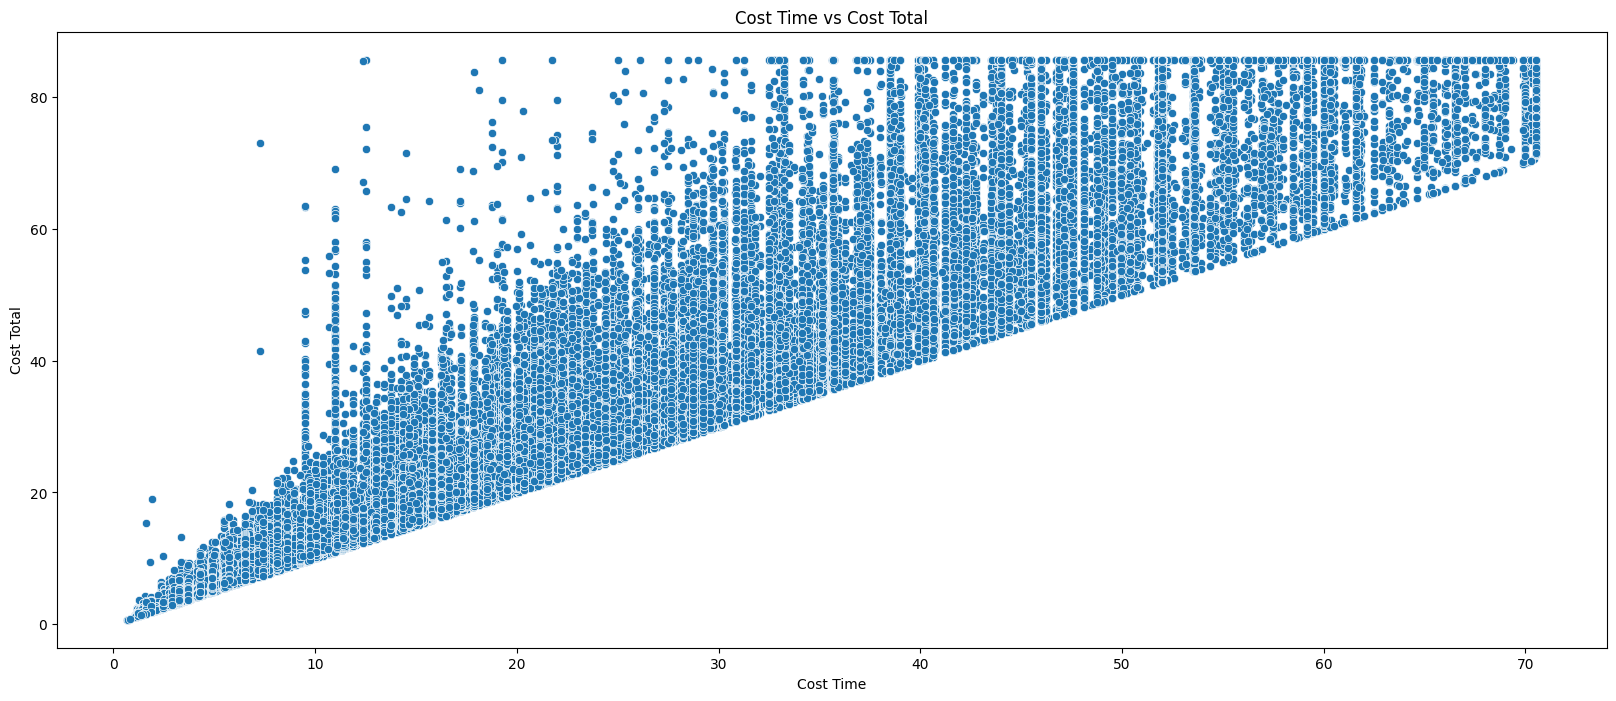

In [9]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x=df['booking_actual_cost_time'], y=df['booking_actual_cost_total'])
plt.title('Cost Time vs Cost Total')
plt.xlabel('Cost Time')
plt.ylabel('Cost Total')
plt.show()

There is a positive correlation between `Cost Distance` and `Cost Total`, indicating that as the distance cost increases, the total cost also tends to increase. This is expected as distance is a significant component of the total cost. The plot shows a dense distribution of data points, especially in the lower ranges of both Cost Distance and Cost Total. This suggests that most bookings have lower distance costs and total costs.

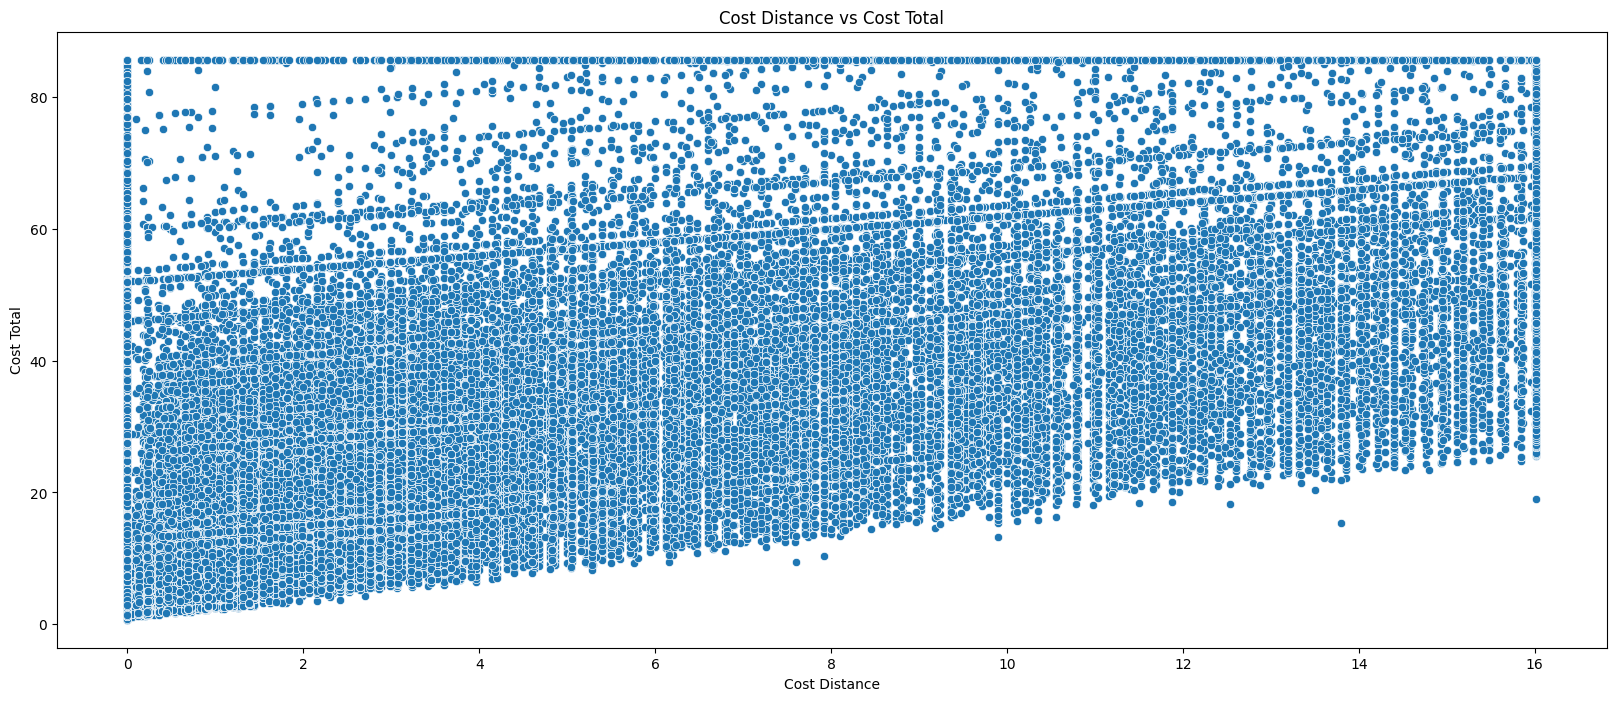

In [10]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x=df['booking_actual_cost_distance'], y=df['booking_actual_cost_total'])
plt.title('Cost Distance vs Cost Total')
plt.xlabel('Cost Distance')
plt.ylabel('Cost Total')
plt.show()

# 4. Analysis - Revenues

## 4.1. How do overall revenues compare based on vehicle type?

The bar chart depicting total revenue per vehicle type provides several key insights. `Everyday vehicles` generate the highest revenue by far, with a total of £6,492,919, indicating their substantial contribution to overall earnings. `Family vehicles` follow, generating £2,920,260 of revenue, which, while significantly less than Everyday vehicles, still represents a considerable portion of the total revenue. `City vehicles` contribute £940,546, placing them in the middle range of revenue generation. `Vans`, with a total revenue of £391,175, and `7 Seaters`, with £23,185, generate the least revenue, reflecting their lower utilisation or popularity. This chart underscores the importance of **Everyday and Family vehicles in the revenue stream**, suggesting that these categories should be a focus for fleet expansion and marketing efforts. The lower revenue figures for Vans and 7 Seaters may indicate a need to either re-evaluate their pricing strategies or to promote their usage more aggressively. Overall, the chart highlights the distribution of revenue across different vehicle types, providing valuable insights for strategic decision-making in vehicle fleet management and marketing.

In [11]:
# Function to format the y-axis labels
def format_y_axis(value, tick_number):
    return f'{value:,.0f}'

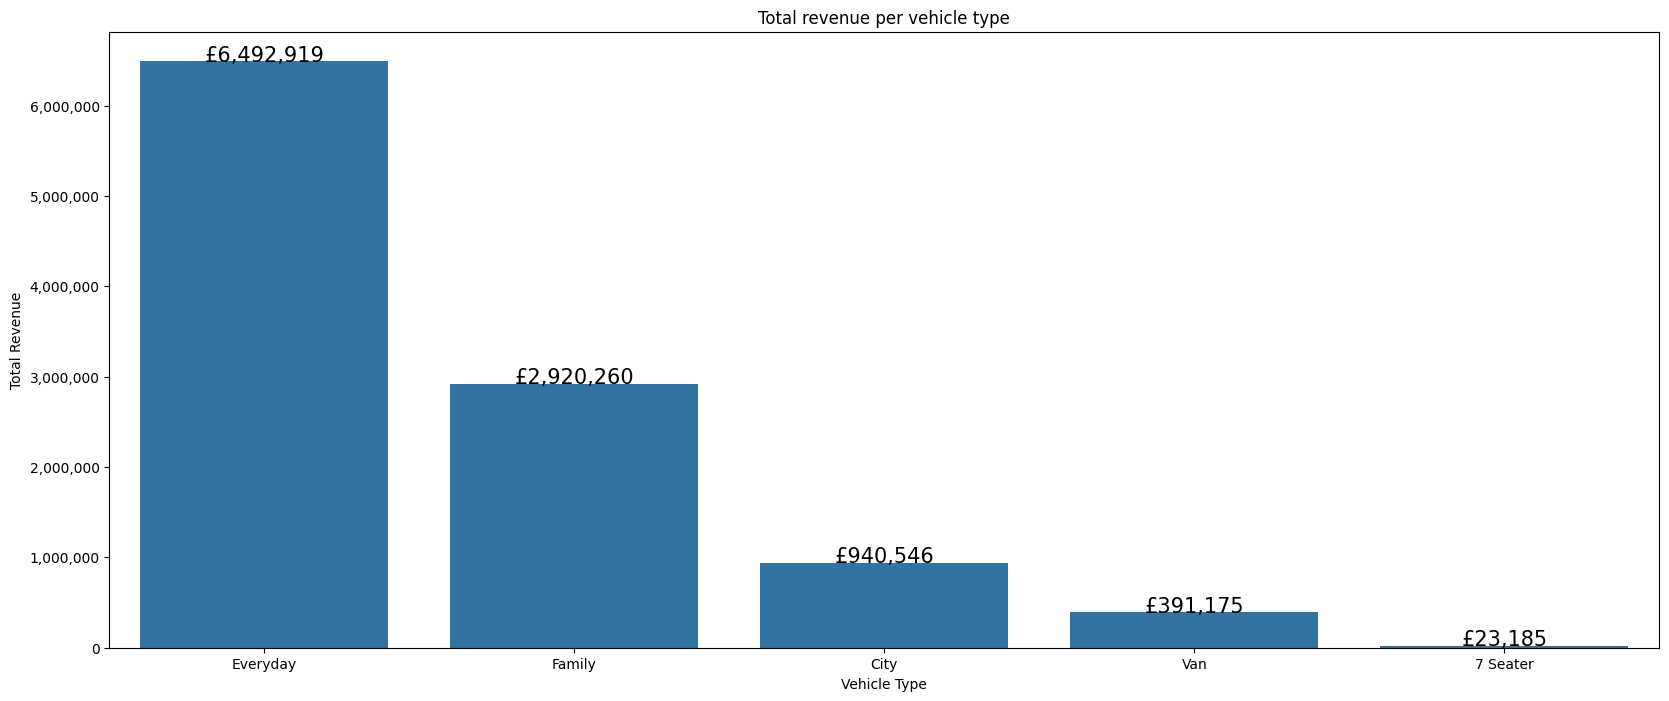

In [12]:
df_revenue_vehicle_type = df.groupby('Vehicle Type')['booking_actual_cost_total'].sum().sort_values(ascending=False).to_frame()

# Creating a bar plot
plt.figure(figsize=(20, 8))
barplot = sns.barplot(x='Vehicle Type', y='booking_actual_cost_total', data=df_revenue_vehicle_type)

# Adding title and labels
plt.title('Total revenue per vehicle type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Revenue')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_revenue_vehicle_type.iterrows():
    barplot.text(index, row['booking_actual_cost_total'], f'£{row["booking_actual_cost_total"]:,.0f}', color='black', ha="center", fontsize=15)

# Displaying the plot
plt.show()

## 4.2. How do overall revenues compare based on location?

The treemap chart provided visualises `total revenues by location`, offering a clear representation of the revenue contribution from various locations. The largest blocks in the treemap indicate the **highest revenue-generating locations, with Glasgow, Oxford, and Bristol standing out as the top contributors**. *Glasgow is the most significant*, reflecting its substantial contribution to total revenues. These locations are key players in the overall revenue landscape, making them critical areas for ongoing investment and focus.

**Locations such as Newcastle, Dundee, Tunbridge Wells, Salford, and Harrogate** also make significant contributions, though smaller than the top three. Their relatively large blocks in the treemap show that they play an important role in overall revenue generation. These moderate contributors highlight the need for balanced attention across multiple high-performing areas to maintain and grow revenue streams.

The smaller blocks represent locations that contribute less to the total revenue, including cities like Gateshead, Swindon, Durham, and many others. Despite their smaller contributions, these locations collectively add to the overall revenue, demonstrating the value of a broad geographical spread. **The presence of numerous smaller blocks indicates that even less prominent locations play a role in the business's financial health, suggesting potential areas for targeted marketing efforts or strategic enhancements.**

In [13]:
df_revenue_location = df.groupby('location')['booking_actual_cost_total'].sum().sort_values(ascending=False).to_frame()

# Create a column location from index
df_revenue_location['location'] = df_revenue_location.index

# Creating a bar plot
plt.figure(figsize=(10, 6))
# Create a treemap
fig = px.treemap(df_revenue_location, path=['location'], values='booking_actual_cost_total', title='Total Revenues by Location')

# Show the treemap
fig.show()

<Figure size 1000x600 with 0 Axes>

## 4.3. How do overall revenues compare based on season?

The bar chart illustrating `total revenue per season` offers valuable insights into `seasonal revenue patterns`. `Spring` emerges as the highest revenue-generating season, with a **total revenue of £3,684,843**, indicating a peak period for business activities. This significant revenue highlights the importance of focusing resources and marketing efforts during Spring to maximise financial performance.

`Summer` follows as the second-highest revenue season, **generating £2,801,350.** While still substantial, the revenue is noticeably lower than in Spring, suggesting a moderate decline in business activities. This data could imply the need for targeted promotions or strategies to boost revenue during the Summer months.

**`Autumn` generates £2,652,191 in total revenue**, slightly lower than Summer. This consistent revenue stream indicates steady business performance during Autumn, requiring a balanced approach to resource allocation and customer engagement.

`Winter`, with a **total revenue of £1,629,702**, is the lowest revenue-generating season. The significant drop in revenue compared to other seasons highlights the potential challenges and reduced demand during this period. Strategies to mitigate this decline could include special offers, discounts, or new services tailored to Winter conditions.

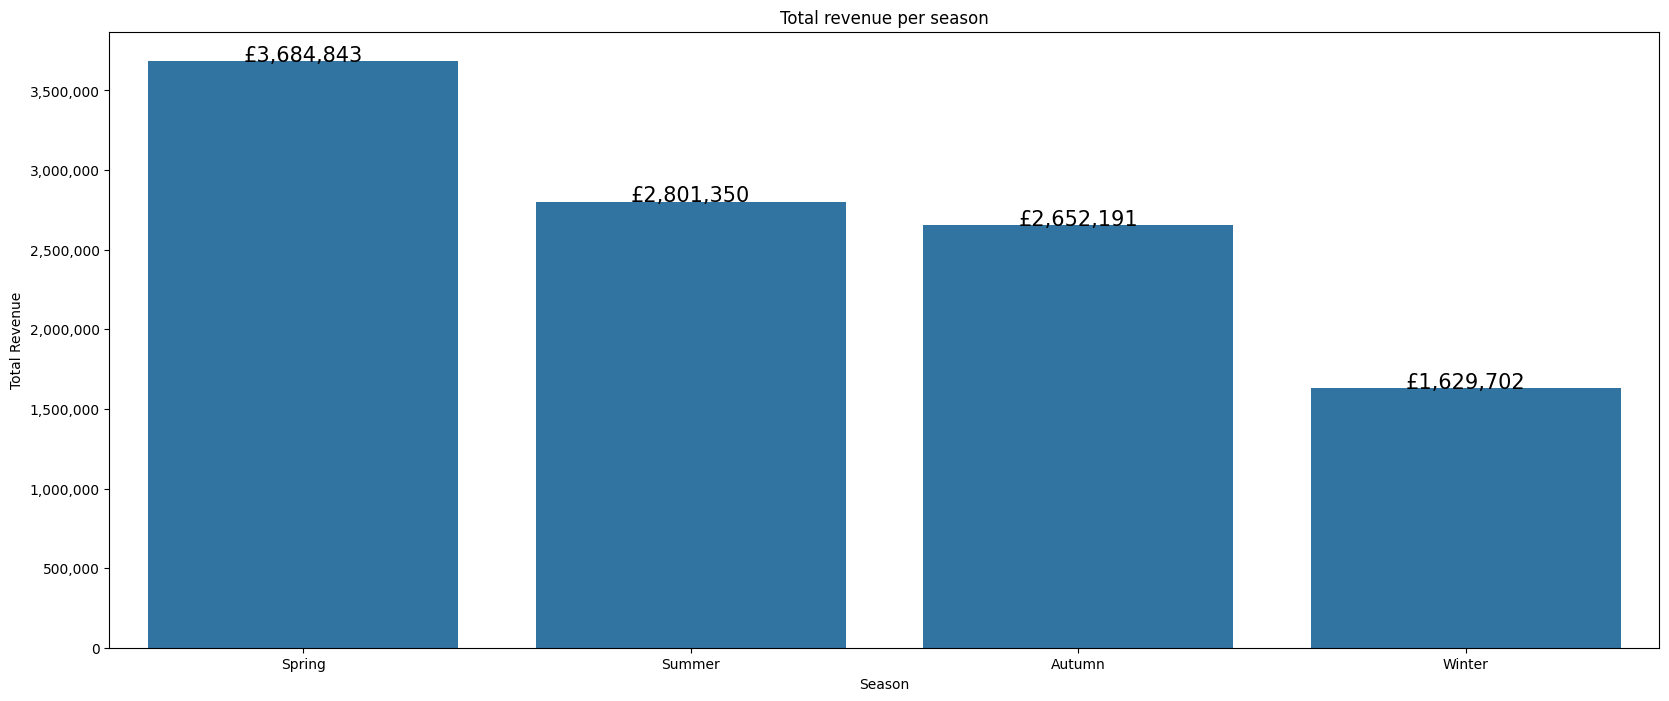

In [14]:
seasonal_revenue = df.groupby('season')['booking_actual_cost_total'].sum().sort_values(ascending=False).to_frame()

# Creating a bar plot
plt.figure(figsize=(20, 8))
barplot = sns.barplot(x='season', y='booking_actual_cost_total', data=seasonal_revenue)

# Adding title and labels
plt.title('Total revenue per season')
plt.xlabel('Season')
plt.ylabel('Total Revenue')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in seasonal_revenue.iterrows():
    barplot.text(index, row['booking_actual_cost_total'], f'£{row["booking_actual_cost_total"]:,.0f}', color='black', ha="center", fontsize=15)

# Displaying the plot
plt.show()

## 4.4. How do overall revenues compare based on yearly season?

The bar chart depicting `total revenue per season from 2018 to 2024` offers an _in-depth view of the revenue trends over these years_. The stacked bars allow for a **clear comparison of how each season contributes to the annual revenue** and how these contributions have evolved.

**2018-2020**: The initial years, particularly 2018 and 2019, show relatively low revenues, with *Spring and Autumn contributing the most*. **_In 2020_**, there is a notable increase in total revenue, particularly in **Autumn (£394,549.15) and Summer (£391,510.95)**, suggesting a recovery or growth phase.

**2021**: This year marks a significant rise in revenues across all seasons, with **Spring leading (£700,072.4) and Summer (£669,256.78)** close behind. Autumn and Winter also see substantial contributions, indicating a robust overall performance.

**2022-2023**: Both years exhibit strong revenue figures with similar patterns. **Spring** remains the dominant season, with **_revenues of £928,845.02 in 2022_** and **_£936,696.69 in 2023_**. **Summer** also shows strong performance, with **_revenues over £720,000_** in both years. Autumn and Winter continue to contribute significantly but remain lower compared to Spring and Summer.

**2024**: The partial data for 2024 shows that **Spring (£527,918.1)** and **Winter (£361,777.46)** continue to be strong revenue seasons. However, the data for Autumn and Summer is not available.

<Figure size 2000x800 with 0 Axes>

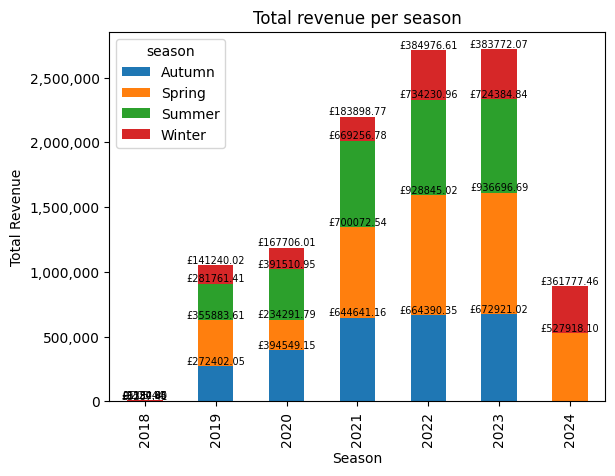

In [15]:
dff = df.copy()

# Convert 'booking_created_at_year' to string if it's numeric for better grouping
dff['booking_created_at_year'] = dff['booking_created_at_year'].astype(str)

yearly_seasonal_revenue = dff.groupby(['booking_created_at_year', 'season'])['booking_actual_cost_total'].sum().unstack()

# Creating a bar plot
plt.figure(figsize=(20, 8))
barplot = yearly_seasonal_revenue.plot(kind='bar', stacked=True)

# Adding title and labels
plt.title('Total revenue per season')
plt.xlabel('Season')
plt.ylabel('Total Revenue')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Loop through each patch (a rectangle in the bar chart)
for bar in barplot.patches:
    # Get the appropriate location to place the text
    # In this case, x is the horizontal center of the bar, and y is the height of the bar
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_height = bar.get_height()
    bar_y = bar.get_y() + bar_height

    # Only add text annotations if there is enough space (height)
    if bar_height > 0:
        plt.text(bar_x, bar_y, f'£{bar_height:.2f}',
                 ha='center', va='bottom', color='black', rotation=0, fontsize=7)

# Displaying the plot
plt.show()

## 4.5. How do overall revenues compare based on both location and vehicle type?

In [16]:
location_vehicle_revenue = df.groupby(['Vehicle Type', 'location'])['booking_actual_cost_total'].sum()
df_location_vehicle_revenue = pd.DataFrame(location_vehicle_revenue)
df_location_vehicle_revenue.reset_index(inplace=True)

### 4.5.1. Vehicle Type - 7 Seater

The bar chart depicting `total revenue for 7 Seater vehicles` based on `location` provides insights into the performance of this vehicle type across different locations. The data highlights three specific locations: **Aberdeen, Gateshead, and Oxford.**

_Gateshead emerges as the top performer_, generating the **highest total revenue of £9,331 for 7 Seater vehicles**. This indicates a strong demand for 7 Seaters in Gateshead, suggesting that this location may benefit from a higher availability of such vehicles or targeted marketing strategies to further capitalise on this demand.

_Oxford follows as the second-highest revenue generator_, with a **total of £7,424**. While not as high as Gateshead, the revenue from Oxford is still substantial, reflecting a significant market for 7 Seaters. This location also presents opportunities for growth, possibly through promotional efforts or service enhancements to attract more customers.

_Aberdeen_, with a **total revenue of £6,430**, ranks third among the three locations. Although it has the lowest revenue in comparison, the figures indicate a decent level of demand for 7 Seaters. This suggests that Aberdeen could benefit from strategies aimed at boosting bookings, such as targeted advertising or special offers.

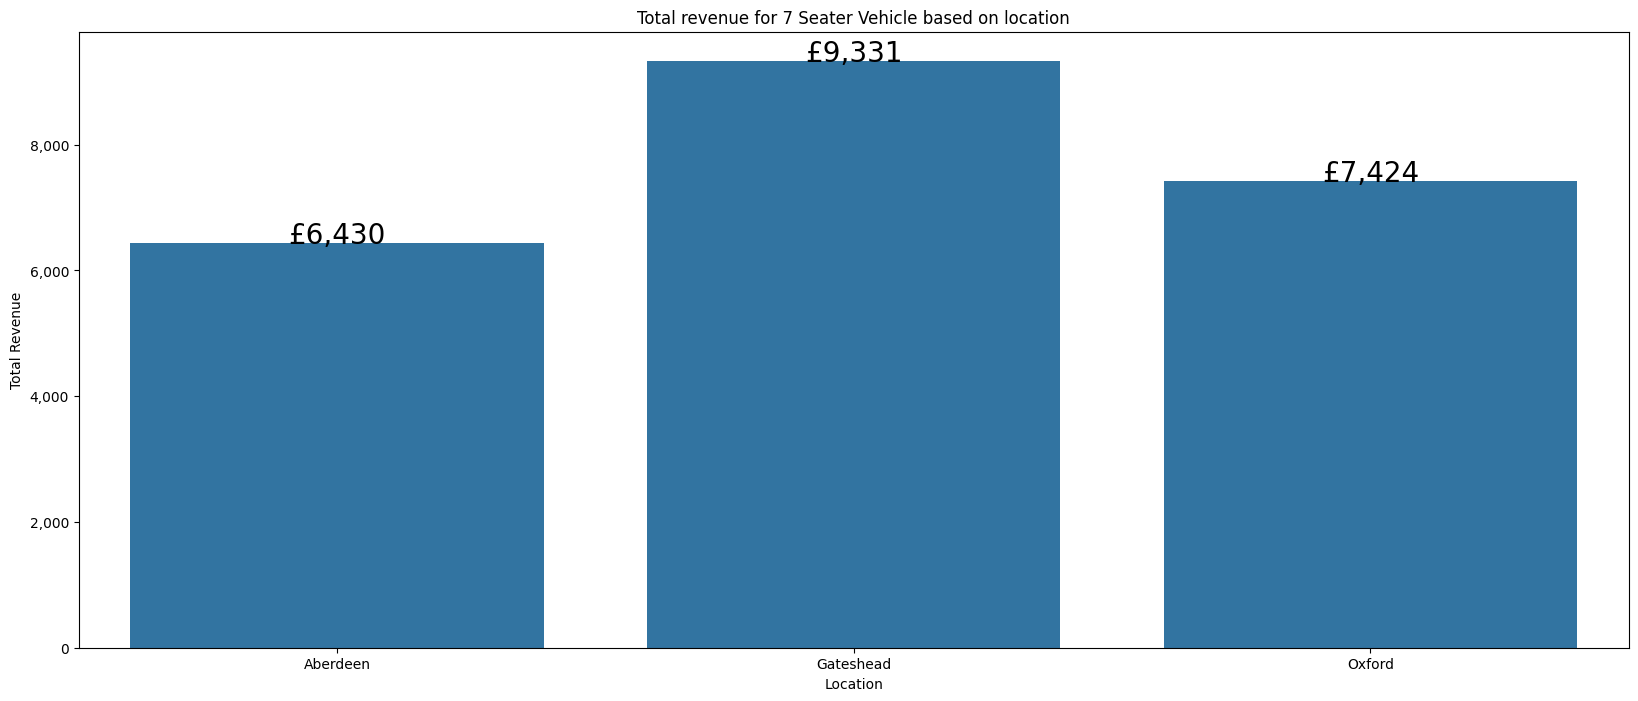

In [17]:
# Creating a bar plot - 7 Seater
plt.figure(figsize=(20, 8))
df_location_vehicle_revenue_7_seater = df_location_vehicle_revenue[df_location_vehicle_revenue['Vehicle Type'] == '7 Seater']
barplot = sns.barplot(x='location', y='booking_actual_cost_total', data=df_location_vehicle_revenue_7_seater)

# Adding title and labels
plt.title('Total revenue for 7 Seater Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Revenue')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_revenue_7_seater.iterrows():
    barplot.text(row['location'], row['booking_actual_cost_total'], f'£{row["booking_actual_cost_total"]:,.0f}', color='black', ha="center", fontsize=20)

# Displaying the plot
plt.show()

### 4.5.2. Vehicle Type - City

The bar chart illustrating `total revenue for City vehicles` based on location provides a detailed view of the financial performance of City vehicles across various locations. **Glasgow stands out as the highest revenue-generating location**, with a **total revenue of £208,074**, indicating a strong demand for City vehicles and suggesting a strategic area for fleet expansion and marketing efforts. **Oxford** follows as the second-highest performer with **£131,790 in revenue**, reflecting high utilisation and positioning it as a critical market for maintaining and potentially increasing the fleet. **Bristol ranks third with £95,241**, showing robust performance and opportunities for continued growth and investment.

Moderate revenue locations include **Aberdeen, with £83,805**, and **Newcastle, with £78,108**, both demonstrating significant demand and highlighting their importance for City vehicle operations. Several other locations, such as **Birmingham (£32,612), Lewes (£39,105), and Reading (£23,303)**, show stable demand and potential for further growth with targeted marketing and strategic fleet management.

Lower revenue locations, such as **Bournemouth (£22,446), Chelmsford (£11,832), and Derby (£16,667)**, while modest in their contributions, still play a role in overall revenue. These markets may benefit from promotional activities or service enhancements to boost performance. _The data reveals significant variations in revenue across different locations, emphasizing the need for high-revenue locations like Glasgow, Oxford, and Bristol to be focal points for resource allocation and strategic planning. Moderate and lower-revenue locations offer potential for growth through targeted initiatives._

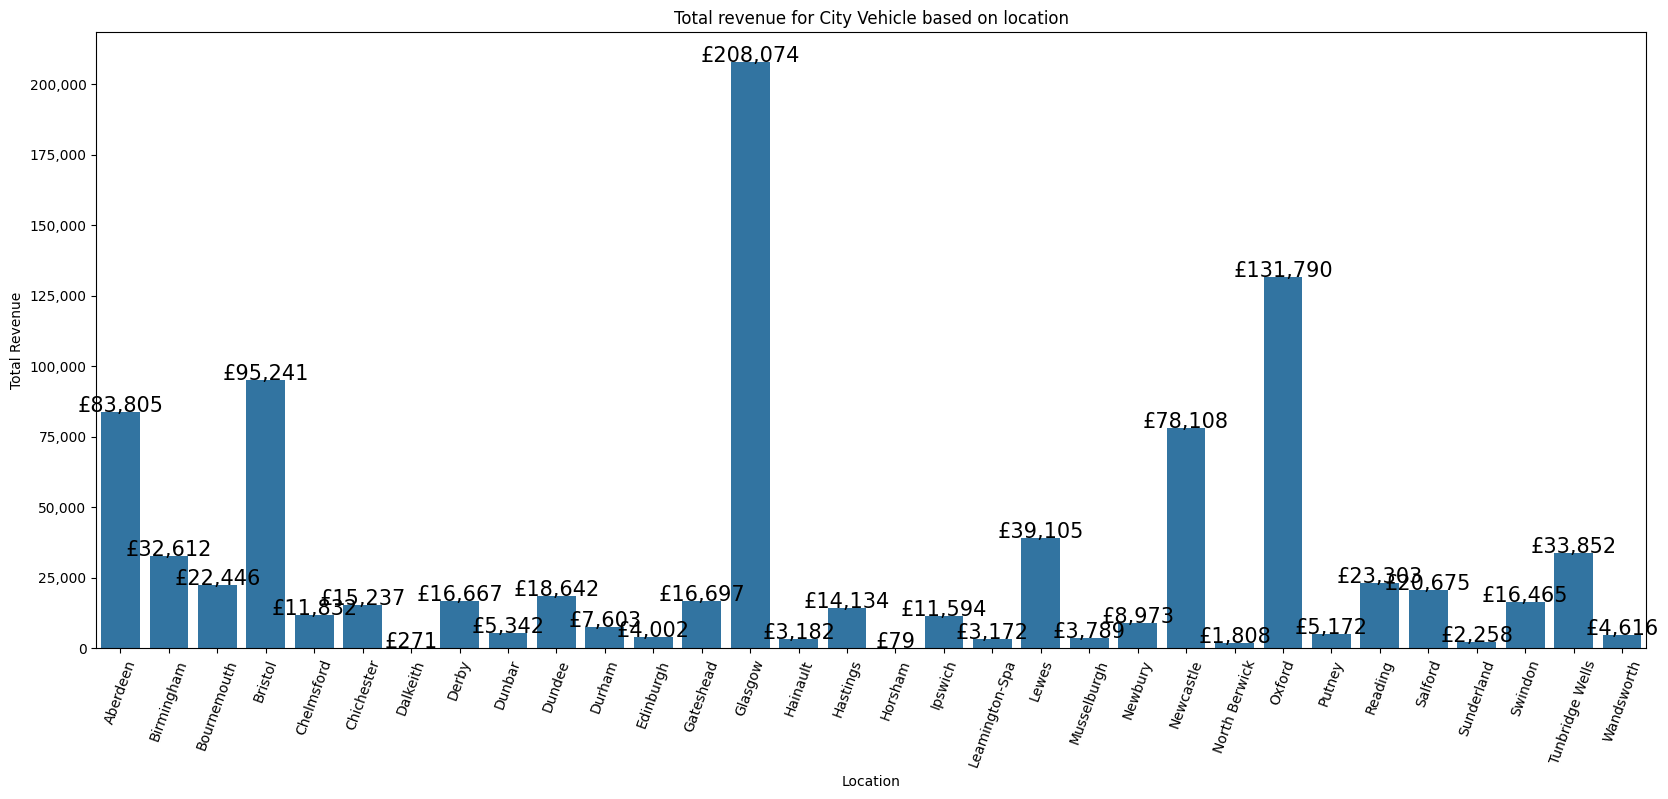

In [18]:
# Creating a bar plot - City
plt.figure(figsize=(20, 8))
df_location_vehicle_revenue_city = df_location_vehicle_revenue[df_location_vehicle_revenue['Vehicle Type'] == 'City']
barplot = sns.barplot(x='location', y='booking_actual_cost_total', data=df_location_vehicle_revenue_city)

# Adding title and labels
plt.title('Total revenue for City Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Revenue')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_revenue_city.iterrows():
    barplot.text(row['location'], row['booking_actual_cost_total'], f'£{row["booking_actual_cost_total"]:,.0f}', color='black', ha="center", fontsize=15)

plt.xticks(rotation=70)

# Displaying the plot
plt.show()

### 4.5.3. Vehicle Type - Everyday

The bar chart illustrating `total revenue for Everyday vehicles` based on location provides detailed insights into the _financial performance of these vehicles across various locations_. **Glasgow stands out as the highest revenue-generating location** with a significant **total of £1,591,053**, _highlighting the strong demand for Everyday vehicles_ in this area and making it a strategic location for fleet expansion and focused marketing efforts. **Oxford** follows with a **total revenue of £805,299**, indicating high utilisation and making it a critical market for maintaining and possibly increasing the fleet. **Bristol** also shows robust performance, **generating £740,501**, suggesting opportunities for continued growth and investment.

Moderate revenue locations such as **Aberdeen, with £435,955, and Newcastle, with £472,880**, _demonstrate strong demand and highlight their importance in the overall revenue landscape_. **Reading, generating £193,011**, also reflects significant contributions. Other notable locations include **Bournemouth, Edinburgh, and Exeter**, which _show stable demand and potential for further growth_ with targeted marketing and strategic fleet management.

Several locations, including **Abingdon, Banbury, and Chelmsford**, contribute lower revenue figures but still add value to the overall revenue. Targeted promotional activities or service enhancements could help boost performance in these areas. _The data reveals significant variations in revenue across different locations, emphasizing the need for high-revenue locations like **Glasgow, Oxford, and Bristol** to be focal points for resource allocation and strategic planning_. Moderate and lower-revenue locations present opportunities for growth through targeted initiatives and optimisation strategies.

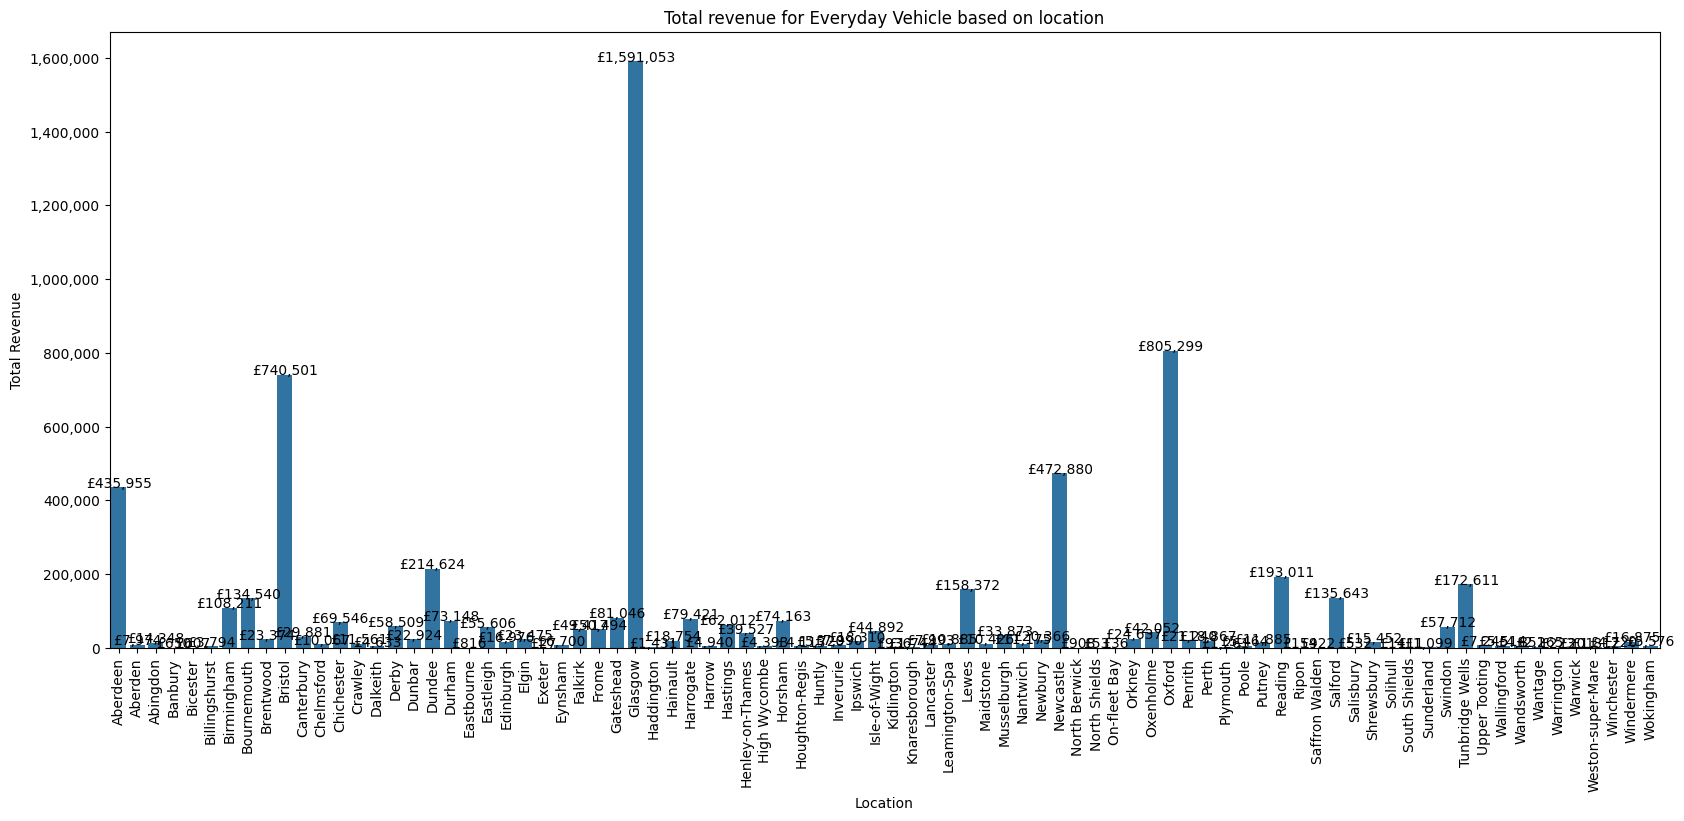

In [19]:
# Creating a bar plot - Everyday
plt.figure(figsize=(20, 8))
df_location_vehicle_revenue_everyday = df_location_vehicle_revenue[df_location_vehicle_revenue['Vehicle Type'] == 'Everyday']
barplot = sns.barplot(x='location', y='booking_actual_cost_total', data=df_location_vehicle_revenue_everyday)

# Adding title and labels
plt.title('Total revenue for Everyday Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Revenue')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_revenue_everyday.iterrows():
    barplot.text(row['location'], row['booking_actual_cost_total'], f'£{row["booking_actual_cost_total"]:,.0f}', color='black', ha="center")

plt.xticks(rotation=90)

# Displaying the plot
plt.show()

### 4.5.4. Vehicle Type - Family

The bar chart illustrating `total revenue for Family vehicles` based on location provides comprehensive insights into the performance of these vehicles across various locations. **Oxford** stands out as the highest revenue-generating location with a **total of £593,168**, highlighting the significant demand for Family vehicles in this area and suggesting it as a strategic focus for fleet expansion and targeted marketing efforts. Close behind is **Bristol, with £582,078**, also indicating high utilisation and the potential for further investment in Family vehicles in this market. **Glasgow follows with a revenue of £587,012**, making it another critical location for maintaining and enhancing the fleet.

Moderate revenue locations include **Aberdeen with £94,030**, **Birmingham with £121,439**, and **Bournemouth with £96,945**, demonstrating strong demand and positioning them as important markets for Family vehicles. **Newcastle, generating £280,321**, also reflects significant contributions and highlights its relevance in the overall revenue landscape. Other notable locations such as **Lewes (69,316 units) and Reading (63,569 units)** _show stable demand and potential for further growth_ with targeted marketing and strategic fleet management.

Several locations, including **Brentwood (£1,391), High Wycombe (£142), and Inverurie (£757)**, _contribute lower revenue figures_. While modest, these locations still add value to the overall revenue and may benefit from promotional activities or service enhancements to boost performance. The data reveals significant variations in revenue across different locations, emphasizing the need for high-revenue locations like **Bristol, Glasgow, and Oxford** to be focal points for resource allocation and strategic planning. Moderate and lower-revenue locations present opportunities for growth through targeted initiatives and optimization strategies.

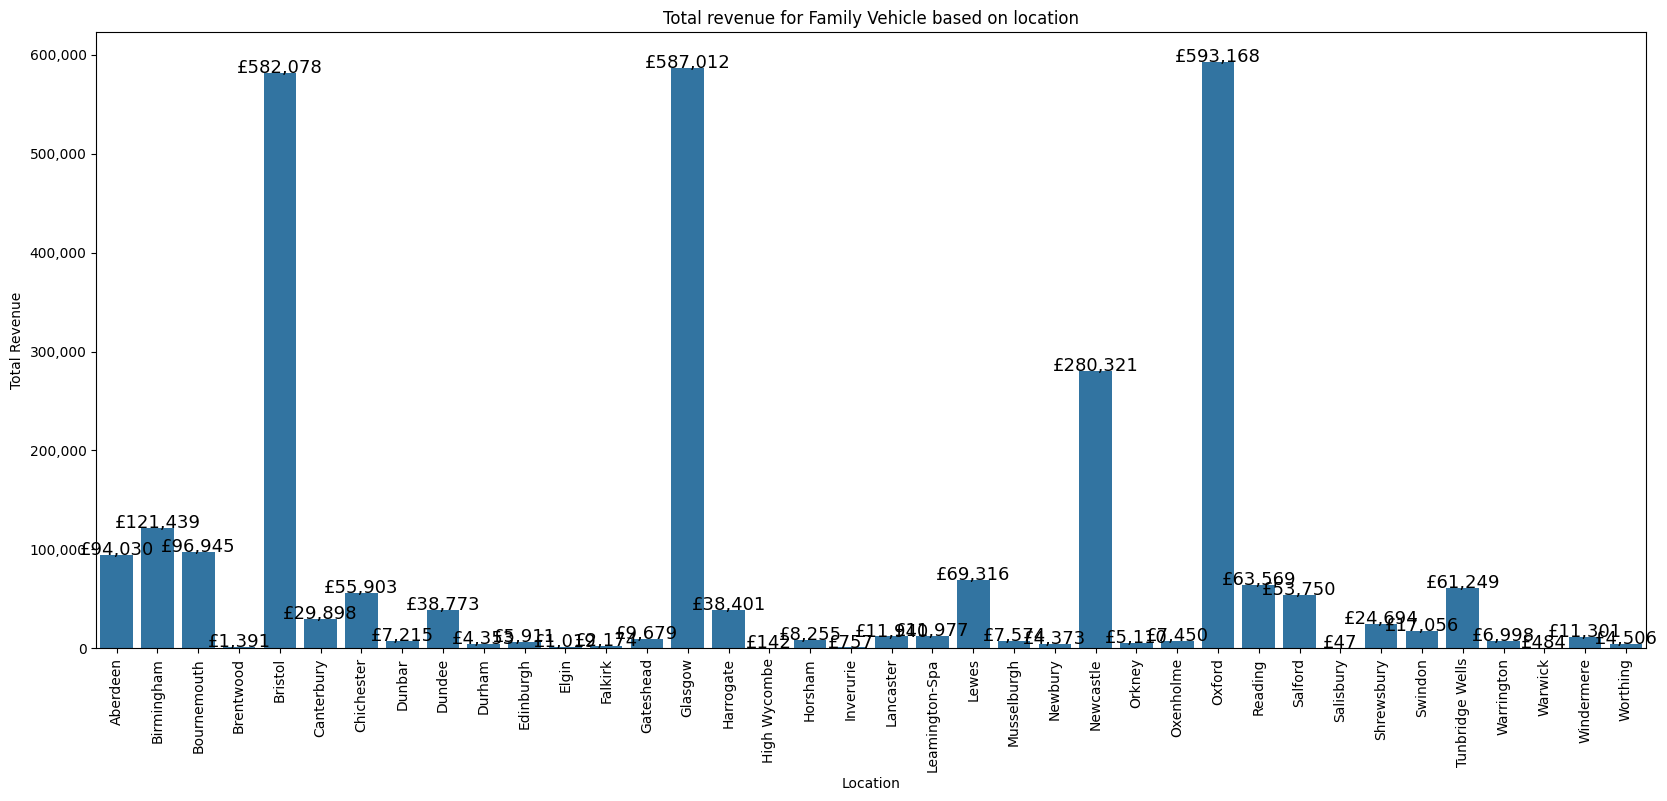

In [20]:
# Creating a bar plot - Family
plt.figure(figsize=(20, 8))
df_location_vehicle_revenue_family = df_location_vehicle_revenue[df_location_vehicle_revenue['Vehicle Type'] == 'Family']
barplot = sns.barplot(x='location', y='booking_actual_cost_total', data=df_location_vehicle_revenue_family)

# Adding title and labels
plt.title('Total revenue for Family Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Revenue')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_revenue_family.iterrows():
    barplot.text(row['location'], row['booking_actual_cost_total'], f'£{row["booking_actual_cost_total"]:,.0f}', color='black', ha="center", fontsize=13)

plt.xticks(rotation=90)

# Displaying the plot
plt.show()

### 4.5.5. Vehicle Type - Van

The bar chart depicting `total revenue for Van vehicles` based on location provides valuable insights into the _financial performance of these vehicles across various locations_. **Glasgow emerges as the highest revenue-generating location, with a substantial total of £119,787**, indicating a strong demand for Van vehicles in this area and suggesting it as a strategic focus for fleet expansion and targeted marketing efforts. **Oxford follows with a revenue of £77,476**, highlighting significant utilisation and positioning it as another critical market for maintaining and possibly increasing the fleet of Van vehicles.

**Bristol** also shows robust performance, **generating £62,106**, which suggests opportunities for continued growth and investment in this location. **Newcastle, with a revenue of £49,124**, demonstrates moderate demand and highlights its relevance in the overall revenue landscape for Van vehicles. Other notable locations such as **Harrogate (£23,853), Dundee (£20,873), Aberdeen (£16,359), and Birmingham (£17,540)** also _reflect significant contributions, indicating stable demand and potential for further growth_ through targeted marketing and strategic fleet management.

Several locations, including **Bournemouth (£541), Coatbridge (£642), and Falkirk (£2,873)**, contribute lower revenue figures. While modest, these locations still add value to the overall revenue. They may benefit from promotional activities or service enhancements to boost performance. _The data reveals significant variations in revenue across different locations, emphasizing the need for high-revenue locations like **Glasgow, Oxford, and Bristol** to be focal points for resource allocation and strategic planning. Moderate and lower-revenue locations present opportunities for growth through targeted initiatives and optimisation strategies._

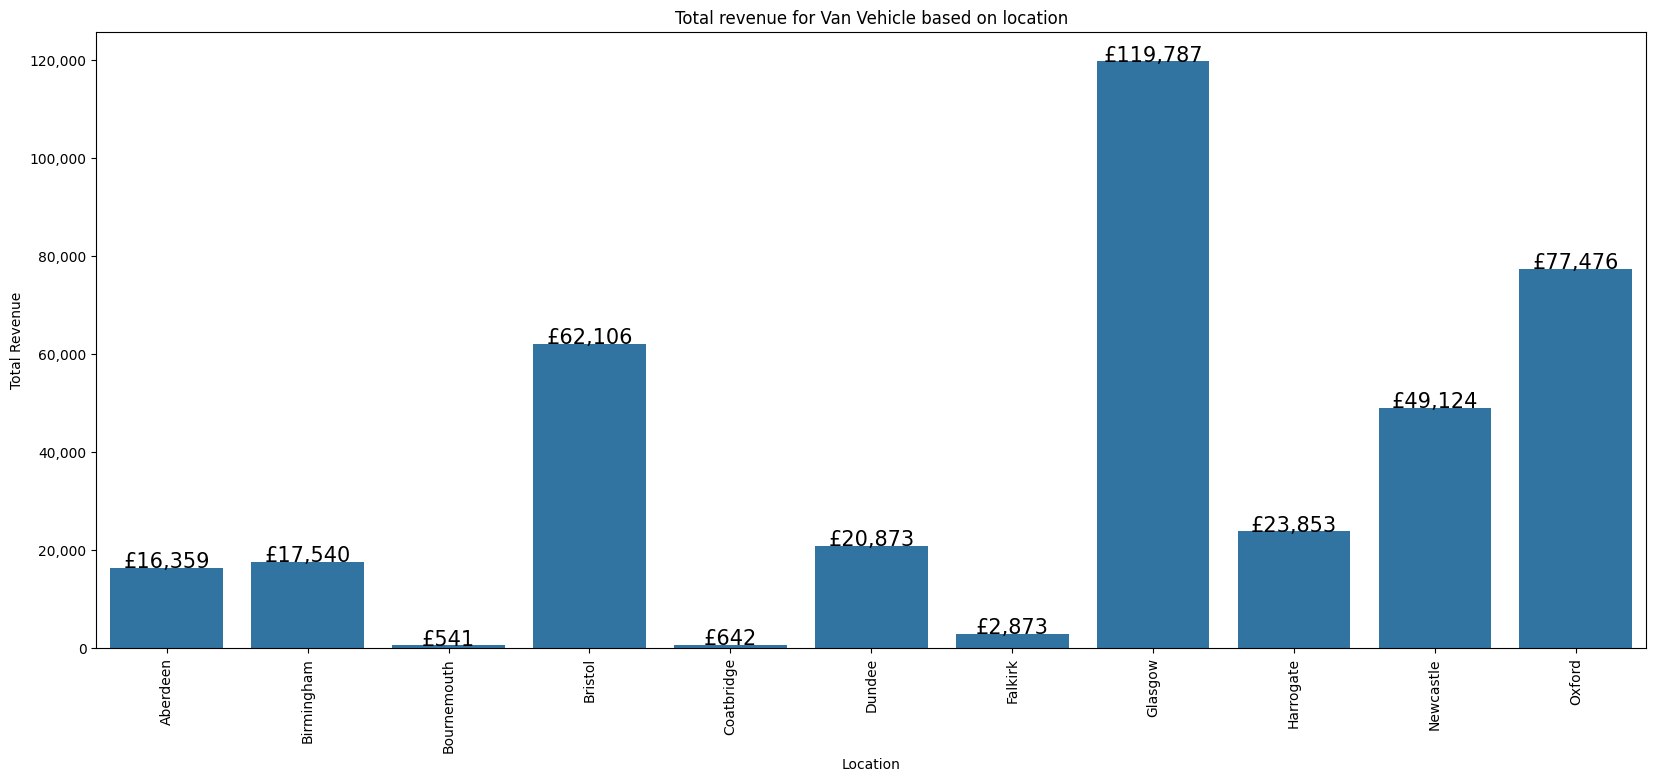

In [21]:
# Creating a bar plot - Van
plt.figure(figsize=(20, 8))
df_location_vehicle_revenue_van = df_location_vehicle_revenue[df_location_vehicle_revenue['Vehicle Type'] == 'Van']
barplot = sns.barplot(x='location', y='booking_actual_cost_total', data=df_location_vehicle_revenue_van)

# Adding title and labels
plt.title('Total revenue for Van Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Revenue')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_revenue_van.iterrows():
    barplot.text(row['location'], row['booking_actual_cost_total'], f'£{row["booking_actual_cost_total"]:,.0f}', color='black', ha="center", fontsize=15)

plt.xticks(rotation=90)

# Displaying the plot
plt.show()

# 5. Analysis - Total Bookings (Demand)

## 5.1. How do overall demand compare based on vehicle type?

The bar chart illustrating `total demand per vehicle type` provides a clear overview of _how different vehicle categories are utilised_. **Everyday vehicles dominate the demand**, with a **total of 240,827 bookings**, _indicating their popularity and frequent use_. This high demand highlights the necessity for a substantial fleet of Everyday vehicles to meet customer needs effectively.

**Family vehicles follow as the second most in-demand category, with 86,078 bookings**. This significant figure underscores the importance of maintaining a well-stocked inventory of Family vehicles to cater to a substantial segment of the market.

**City vehicles, with a demand of 38,938 bookings**, rank third, _showing a moderate level of utilisation_. While not as high as Everyday or Family vehicles, the demand for City vehicles is still considerable, necessitating a balanced approach in fleet management to ensure availability.

**Vans, with a total demand of 12,171 bookings**, reflect a lower but notable level of utilisation. This indicates a specific, albeit smaller, market segment that relies on Van vehicles, suggesting the need for targeted strategies to maximize their use and profitability.

**7 Seater vehicles** have the least demand, with **only 600 bookings**. This minimal demand suggests that _7 Seaters are either less popular or have more specialised use cases_. Therefore, maintaining a smaller, yet adequate, fleet of 7 Seater vehicles would be prudent to meet this niche demand without over-allocating resources.

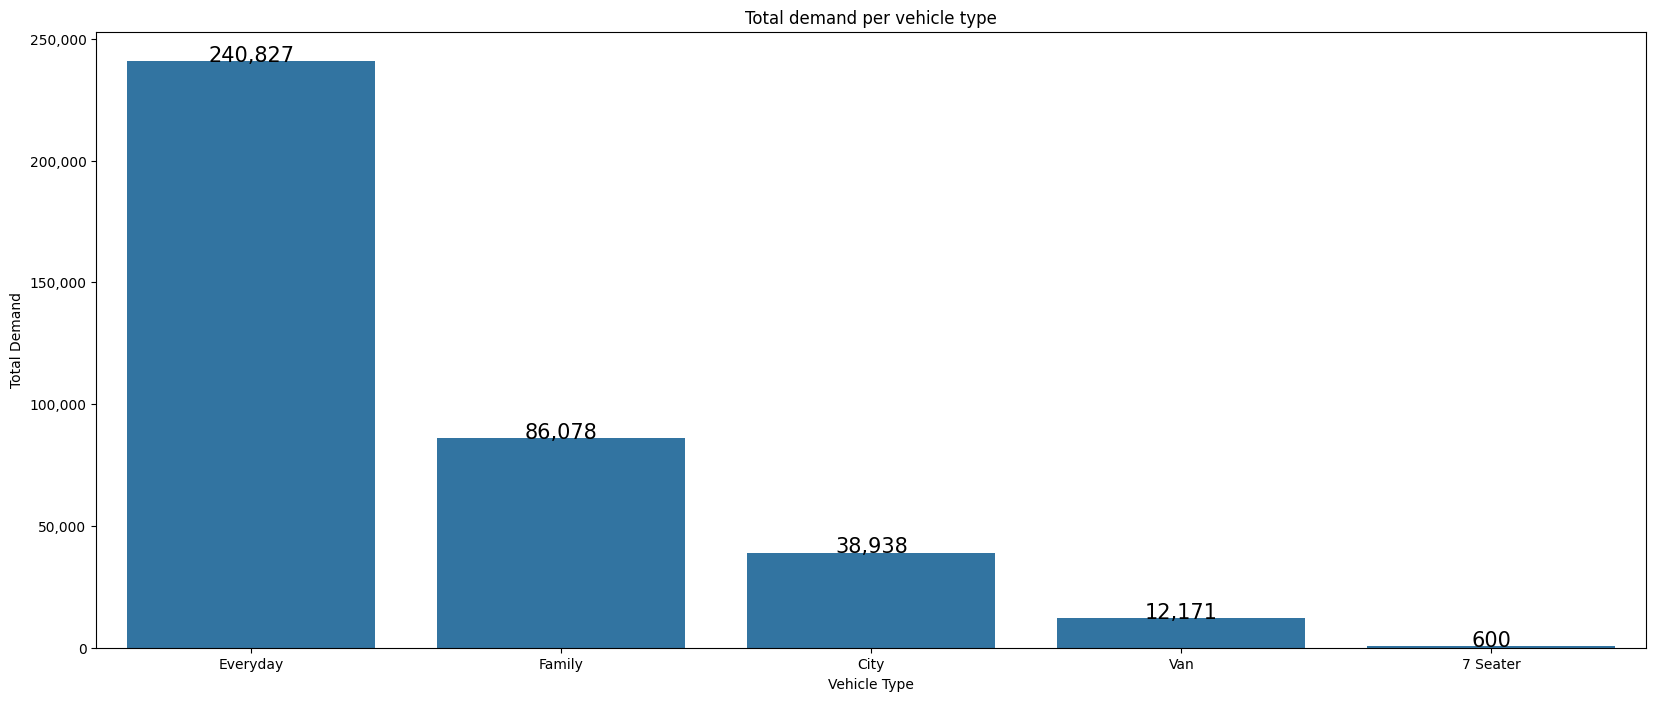

In [22]:
demand_vehicle_type = df.groupby('Vehicle Type')['booking_id'].count().sort_values(ascending=False).to_frame()

# Creating a bar plot
plt.figure(figsize=(20, 8))
barplot = sns.barplot(x='Vehicle Type', y='booking_id', data=demand_vehicle_type)

# Adding title and labels
plt.title('Total demand per vehicle type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Demand')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in demand_vehicle_type.iterrows():
    barplot.text(index, row['booking_id'], f'{row["booking_id"]:,.0f}', color='black', ha="center", fontsize=15)

# Displaying the plot
plt.show()

## 5.2. How do overall demand compare based on location?

The treemap chart illustrating `total demand by location` provides a visual representation of _how demand for vehicles is distributed across various locations_. **Glasgow stands out as the highest demand location, indicated by the largest block**, _suggesting a strong market for vehicle rentals and highlighting it as a key area for resource allocation and strategic focus_.

**Oxford follows as the second highest demand location**, with a substantial block size that _reflects significant utilisation of vehicles_. This makes Oxford another critical market for ensuring a sufficient supply of vehicles to meet customer needs. **Bristol also shows considerable demand**, _placing it among the top locations and underscoring the need for targeted marketing and fleet management in this area._

Other notable locations with high demand include **Aberdeen, Lewes, Bournemouth, Birmingham, and Salford**. These areas have relatively large blocks, indicating strong demand and the importance of maintaining an adequate fleet to serve these markets effectively. Locations such as **Newcastle, Dundee, Reading, and Tunbridge Wells** also exhibit significant demand, _highlighting them as important markets that contribute to the overall demand landscape._

The chart also shows a multitude of smaller blocks representing various other locations such as **Chichester, Horsham, Swindon, Eastleigh, Derby, and many more**. While _these locations may have lower individual demand, they collectively contribute to a considerable portion of the total demand_, emphasizing the need for a broad and balanced distribution of resources across multiple locations to capture market opportunities.

In [23]:
demand_location = df.groupby('location')['booking_id'].count().sort_values(ascending=False).to_frame()

# Create a column location from index
demand_location['location'] = demand_location.index

# Creating a bar plot
plt.figure(figsize=(10, 6))
# Create a treemap
fig = px.treemap(demand_location, path=['location'], values='booking_id', title='Total Demand by Location')

# Show the treemap
fig.show()

<Figure size 1000x600 with 0 Axes>

## 5.3. How do overall demand compare based on season?

The bar chart illustrating `total demand per season provides a clear view of how vehicle demand varies throughout the year`. **Spring emerges as the season with the highest demand, totaling 128,103 bookings**. This peak demand indicates that _Spring is a crucial period for vehicle rentals_, necessitating an ample supply and strategic marketing efforts to meet customer needs effectively.

**Autumn follows as the second-highest demand season, with a total of 95,151 bookings**. This significant demand suggests a strong market presence during Autumn, highlighting the importance of maintaining an adequate fleet and robust marketing strategies to capitalise on this period.

**Summer is close behind Autumn**, with a **total demand of 93,616 bookings**. The high demand during Summer reflects the season's importance in the rental market, emphasizing the need for efficient resource allocation and promotional activities to maximise revenue.

**Winter has the lowest demand among the seasons**, with a **total of 61,744 bookings**. Although Winter shows the least demand, it still represents a _considerable market segment_. _**Strategies to boost Winter rentals could include special offers, discounts, and tailored services to attract more customers during this slower period.**_

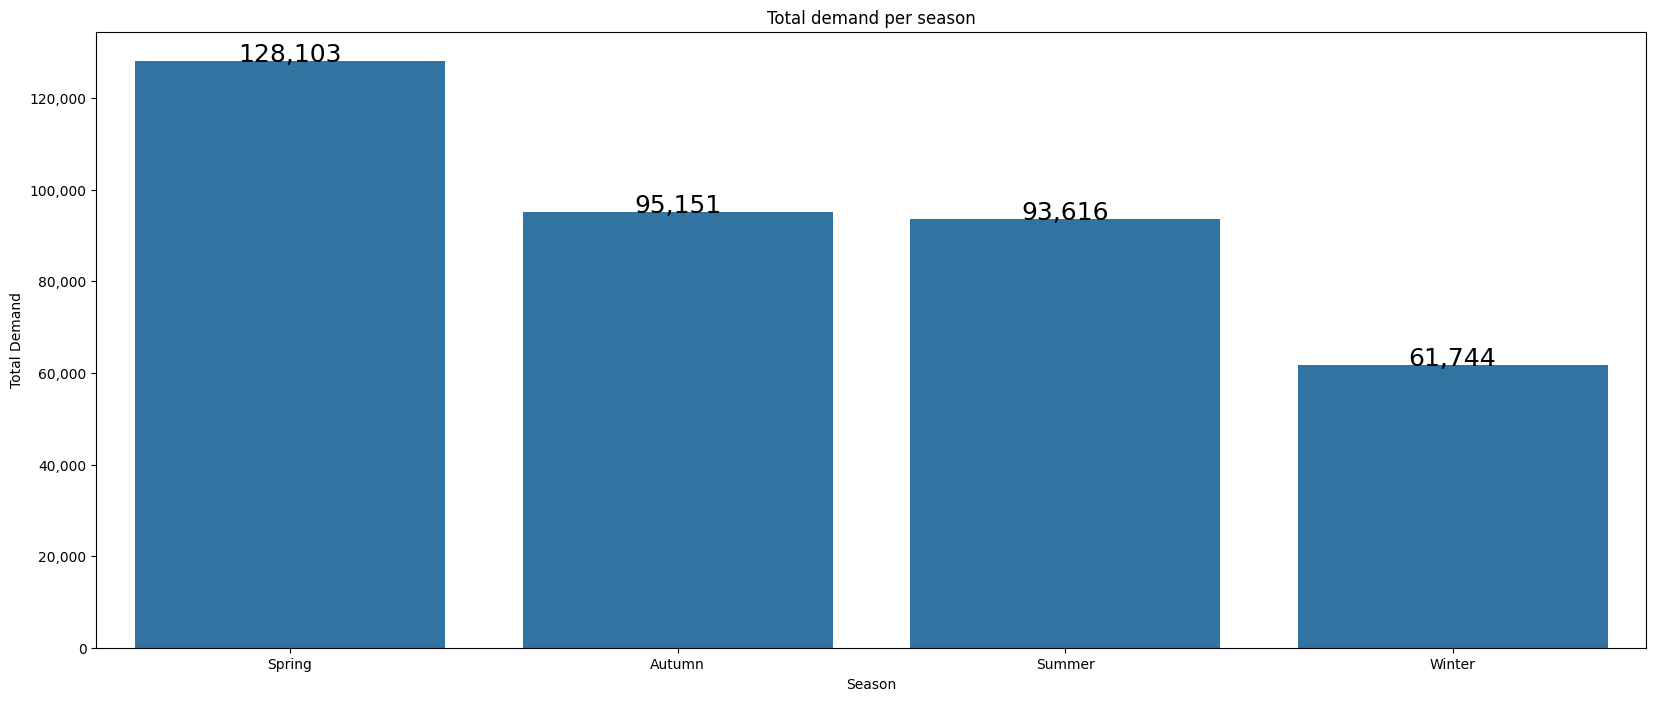

In [24]:
seasonal_demand = df.groupby('season')['booking_id'].count().sort_values(ascending=False).to_frame()

# Creating a bar plot
plt.figure(figsize=(20, 8))
barplot = sns.barplot(x='season', y='booking_id', data=seasonal_demand)

# Adding title and labels
plt.title('Total demand per season')
plt.xlabel('Season')
plt.ylabel('Total Demand')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in seasonal_demand.iterrows():
    barplot.text(index, row['booking_id'], f'{row["booking_id"]:,.0f}', color='black', ha="center", fontsize=18)

# Displaying the plot
plt.show()

## 5.4. How do overall demand compare based on yearly season?

The bar chart illustrating `total demand per season from 2018 to 2024` provides a detailed view of _**how vehicle demand has evolved over these years**_. The stacked bars represent the _total demand for each season_, **_highlighting variations and trends in vehicle rental patterns._**

**2018-2019**: The initial years show relatively low demand, with **2018 having the least total demand across all seasons**. _In 2019, there is a noticeable increase_, particularly in **Spring (13,708 bookings) and Summer (10,388 bookings)**, _indicating a gradual growth in market demand._

**2020**: This year marks a significant rise in demand across all seasons. **Autumn (17,005 bookings) and Summer (14,586 bookings)** see substantial increases, _reflecting a robust growth phase. Spring and Winter also contribute notably, indicating a balanced demand throughout the year._

**2021**: Demand continues to grow, with **Spring (27,601 bookings) and Summer (24,076 bookings) leading the way**. **Autumn (23,974 bookings) and Winter (8,876 bookings)** also show strong performance, _highlighting a peak period for vehicle rentals._

**2022-2023**: These years exhibit sustained high demand, with **Spring maintaining its lead**. **In 2022, Spring demand reaches 30,345 bookings**, while **Autumn and Summer also show significant figures at 21,715 bookings and 22,442 bookings**, respectively. **In 2023, Spring remains strong at 29,116 bookings, with Autumn (21,513 bookings) and Summer (22,119 bookings)** continuing to perform well. _Winter demand remains stable, reflecting a consistent market throughout the year._

**2024**: The partial data for 2024 indicates a strong start, particularly for **Spring (16,791 bookings) and Winter (12,889 bookings)**. _While the data for the other seasons is not yet complete, the early figures suggest continued high demand, especially in the early part of the year._


<Figure size 2000x2000 with 0 Axes>

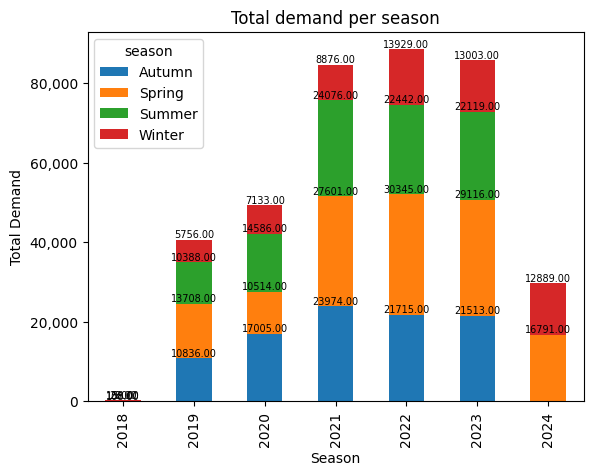

In [25]:
dff = df.copy()

# Convert 'booking_created_at_year' to string if it's numeric for better grouping
dff['booking_created_at_year'] = dff['booking_created_at_year'].astype(str)

yearly_seasonal_demand = dff.groupby(['booking_created_at_year', 'season'])['booking_id'].count().unstack()

# Creating a bar plot
plt.figure(figsize=(20, 20))
barplot = yearly_seasonal_demand.plot(kind='bar', stacked=True)

# Adding title and labels
plt.title('Total demand per season')
plt.xlabel('Season')
plt.ylabel('Total Demand')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Loop through each patch (a rectangle in the bar chart)
for bar in barplot.patches:
    # Get the appropriate location to place the text
    # In this case, x is the horizontal center of the bar, and y is the height of the bar
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_height = bar.get_height()
    bar_y = bar.get_y() + bar_height

    # Only add text annotations if there is enough space (height)
    if bar_height > 0:
        plt.text(bar_x, bar_y, f'{bar_height:.2f}',
                 ha='center', va='bottom', color='black', rotation=0, fontsize=7)

# Displaying the plot
plt.show()

## 5.5. How do overall demand compare based on both location and vehicle type?

In [26]:
location_vehicle_demand = df.groupby(['Vehicle Type', 'location'])['booking_id'].count()
df_location_vehicle_demand = pd.DataFrame(location_vehicle_demand)
df_location_vehicle_demand.reset_index(inplace=True)

### 5.5.1. Vehicle Type - 7 Seater

The bar chart shows the `total demand for 7 Seater vehicles by location`. **Gateshead has the highest demand with 287 bookings**, indicating a strong preference for this vehicle type. **Oxford follows with 159 bookings**, and **Aberdeen has 154 bookings**. _These insights are crucial for fleet management, highlighting the need to focus resources on **Gateshead, Oxford, and Aberdeen** to meet customer demand and optimise revenue._

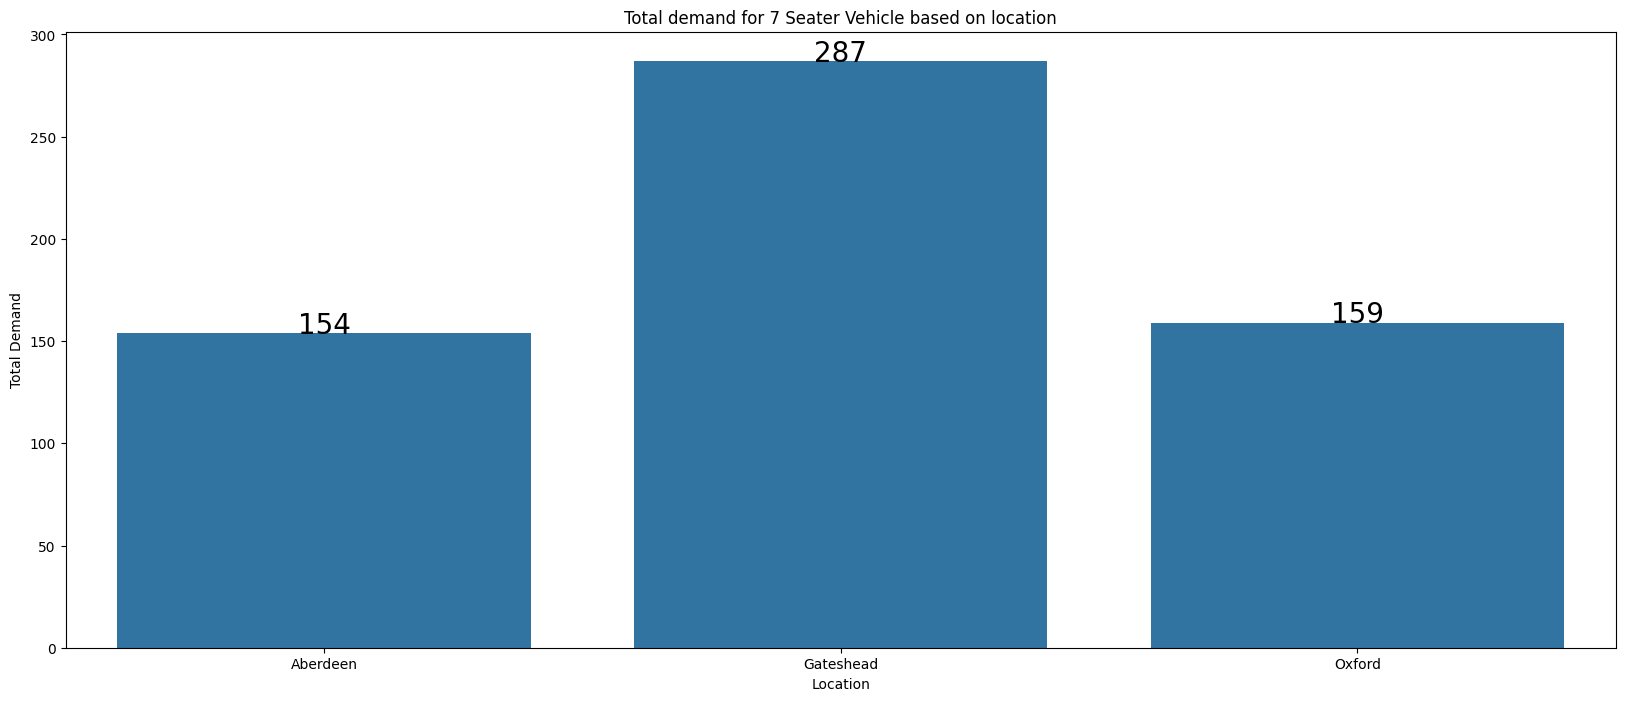

In [27]:
# Creating a bar plot - 7 Seater
plt.figure(figsize=(20, 8))
df_location_vehicle_demand_7_seater = df_location_vehicle_demand[df_location_vehicle_demand['Vehicle Type'] == '7 Seater']
barplot = sns.barplot(x='location', y='booking_id', data=df_location_vehicle_demand_7_seater)

# Adding title and labels
plt.title('Total demand for 7 Seater Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Demand')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_demand_7_seater.iterrows():
    barplot.text(row['location'], row['booking_id'], f'{row["booking_id"]:,.0f}', color='black', ha="center", fontsize=20)

# Displaying the plot
plt.show()

### 5.5.2. Vehicle Type - City

The bar chart illustrating `total demand for City vehicles by location` highlights key areas of high utilisation. **Glasgow leads with the highest demand at 9,007 bookings**, establishing it as a crucial market requiring significant resource allocation. **Oxford follows with 4,672 bookings**, indicating strong utilisation and the need for a robust fleet. **Aberdeen also shows substantial demand with 4,323 bookings**, underscoring its importance in the market.

Moderate demand is seen in **Bristol (3,564 bookings) and Newcastle (3,051 bookings)**, _both demonstrating strong market presence_. **Lewes (1,876 bookings), Reading (1,055 bookings), and Ipswich (795 bookings) reflect steady utilisation of City vehicles.**

Lower demand locations, such as **Birmingham (1,126 bookings), Bournemouth (945 bookings), Dundee (905 bookings), and Tunbridge Wells (1,372 bookings)**, _represent stable markets that could benefit from targeted marketing to boost utilisation_. _Minimal demand is observed in **Chichester (643 bookings), Salford (622 bookings), and Swindon (739 bookings)**, which still contribute to the overall demand landscape._

These insights are crucial for strategic planning in fleet management, ensuring alignment of City vehicle supply with demand in high-demand areas, while also exploring growth opportunities in moderate and lower-demand locations.

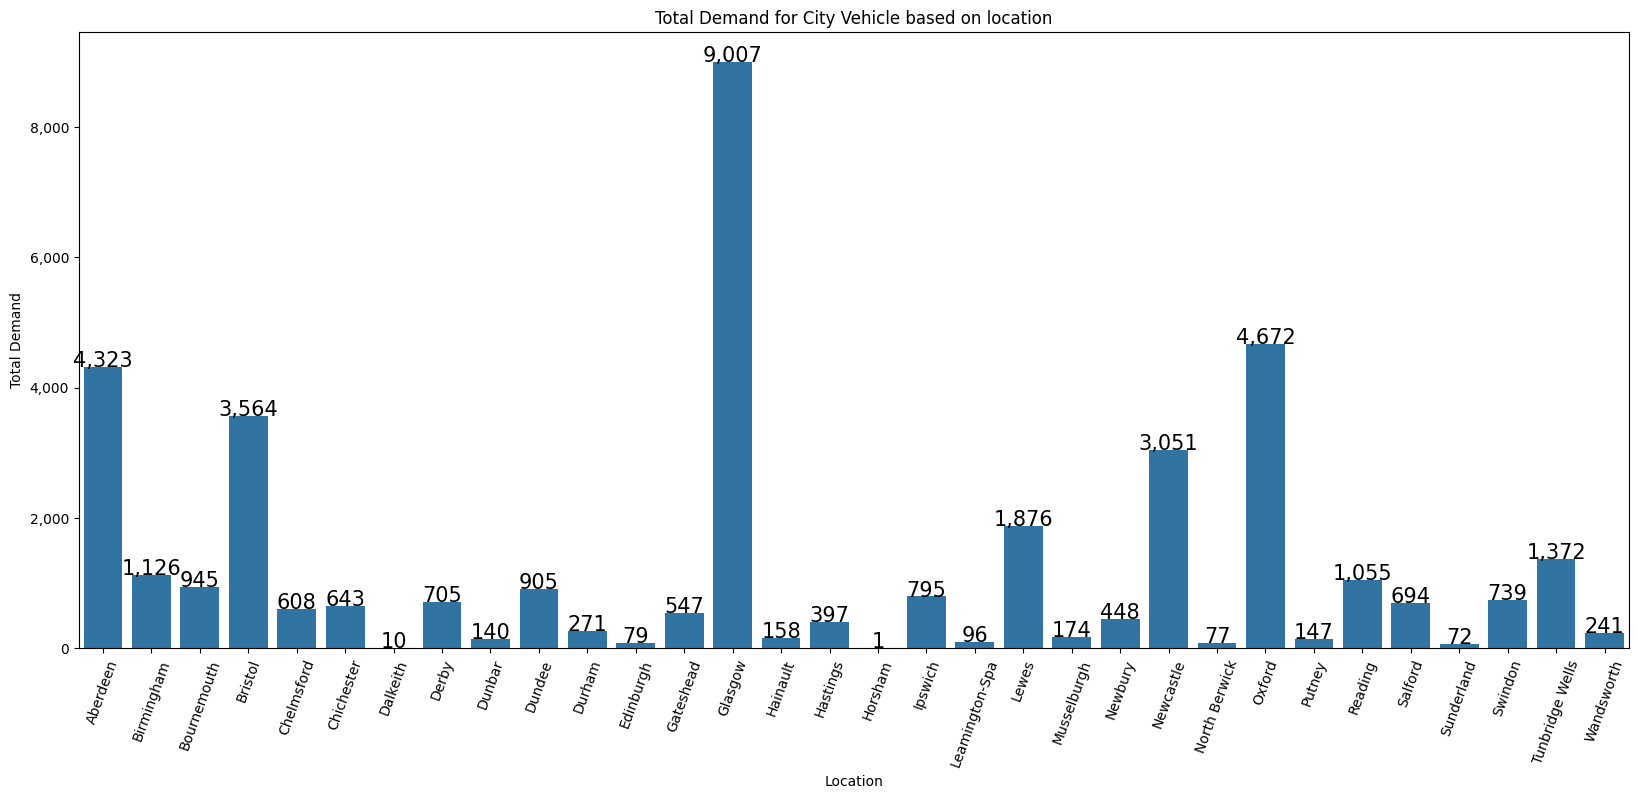

In [28]:
# Creating a bar plot - City
plt.figure(figsize=(20, 8))
df_location_vehicle_demand_city = df_location_vehicle_demand[df_location_vehicle_demand['Vehicle Type'] == 'City']
barplot = sns.barplot(x='location', y='booking_id', data=df_location_vehicle_demand_city)

# Adding title and labels
plt.title('Total Demand for City Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Demand')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_demand_city.iterrows():
    barplot.text(row['location'], row['booking_id'], f'{row["booking_id"]:,.0f}', color='black', ha="center", fontsize=15)

plt.xticks(rotation=70)

# Displaying the plot
plt.show()

### 5.5.3. Vehicle Type - Everyday

The bar chart illustrates `total demand for Everyday vehicles based on location`, _revealing significant variations across different regions_. **Glasgow stands out with the highest demand at 65,603 bookings**, making it the primary market for Everyday vehicles. **Oxford follows with 26,828 bookings**, indicating substantial utilisation. **Aberdeen and Bristol also show considerable demand, with 20,604 bookings and 24,741 bookings**, respectively. Moderate demand is observed in locations like **Newcastle (16,476 bookings) and Dundee (8,295 bookings)**. In contrast, many other locations, such as **Exeter, Leamington Spa, and more, exhibit lower demand, generally below 3,000 bookings**.

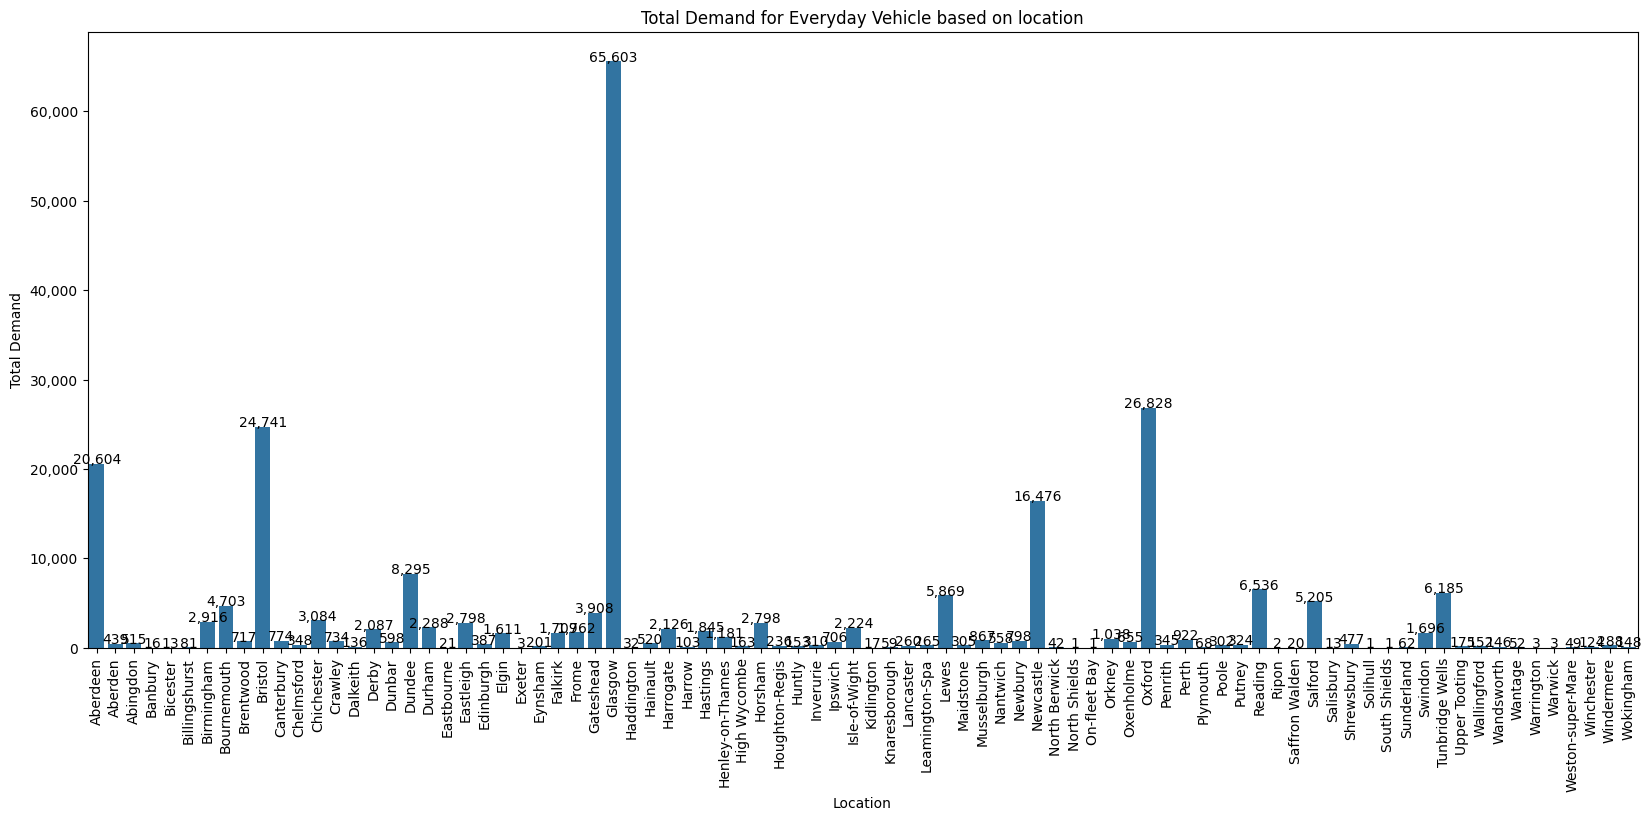

In [29]:
# Creating a bar plot - Everyday
plt.figure(figsize=(20, 8))
df_location_vehicle_demand_everyday = df_location_vehicle_demand[df_location_vehicle_demand['Vehicle Type'] == 'Everyday']
barplot = sns.barplot(x='location', y='booking_id', data=df_location_vehicle_demand_everyday)

# Adding title and labels
plt.title('Total Demand for Everyday Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Demand')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_demand_everyday.iterrows():
    barplot.text(row['location'], row['booking_id'], f'{row["booking_id"]:,.0f}', color='black', ha="center")

plt.xticks(rotation=90)

# Displaying the plot
plt.show()

### 5.5.4. Vehicle Type - Family

The bar chart illustrates the `total demand for Family vehicles based on location`, highlighting significant differences across regions. **Glasgow and Bristol lead with the highest demand, totaling 18,366 and 16,618 bookings**, respectively, indicating these as key markets for Family vehicles. **Oxford also shows high demand at 15,805 bookings**, making it another critical area for resource allocation.

**Newcastle (8,241 bookings) and Birmingham (3,659 bookings)** _demonstrate moderate demand, requiring adequate fleet management to meet customer needs._ Other locations, such as **Aberdeen (2,751 bookings), Reading (2,552 bookings), and Bournemouth (2,836 bookings)**, _reflect lower but still significant demand, suggesting opportunities for growth through targeted marketing._

Smaller locations like **Dunbar, Dundee, and Chichester exhibit minimal demand**, generally **below 2,000 bookings**, highlighting areas where strategic initiatives could enhance utilisation.

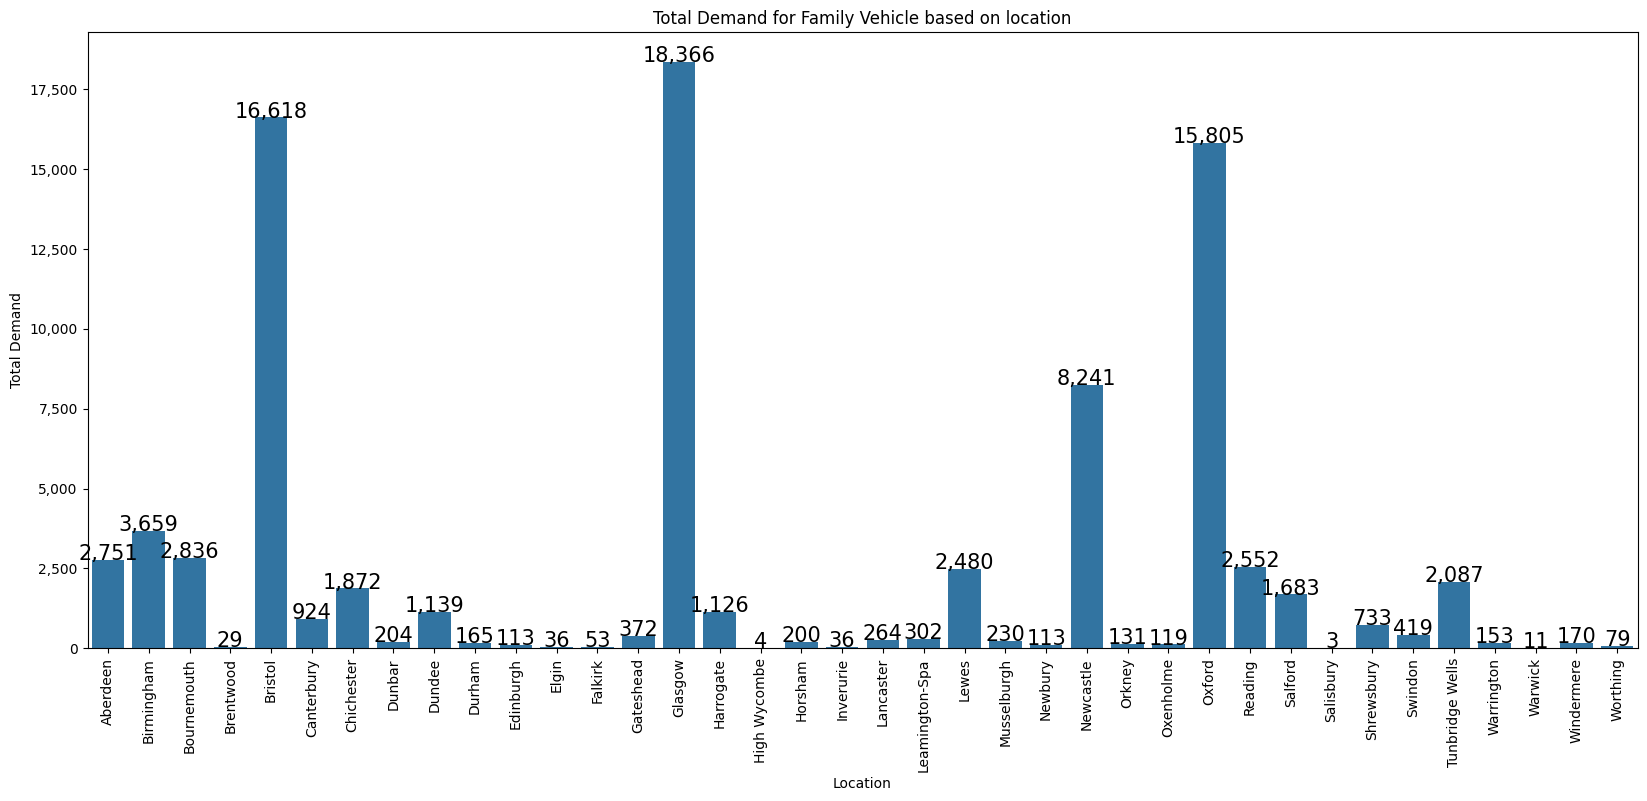

In [30]:
# Creating a bar plot - Family
plt.figure(figsize=(20, 8))
df_location_vehicle_demand_family = df_location_vehicle_demand[df_location_vehicle_demand['Vehicle Type'] == 'Family']
barplot = sns.barplot(x='location', y='booking_id', data=df_location_vehicle_demand_family)

# Adding title and labels
plt.title('Total Demand for Family Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Demand')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_demand_family.iterrows():
    barplot.text(row['location'], row['booking_id'], f'{row["booking_id"]:,.0f}', color='black', ha="center", fontsize=15)

plt.xticks(rotation=90)

# Displaying the plot
plt.show()

### 5.5.5. Vehicle Type - Van

The bar chart illustrates the `total demand for Van vehicles based on location`, highlighting significant demand variations across different regions. **Glasgow stands out with the highest demand, totaling 4,305 bookings**, indicating it as a key market for Van vehicles. **Oxford follows with a significant demand of 2,101 bookings**, _showing substantial utilisation in this area._

Other notable locations include **Bristol (1,740 bookings), Newcastle (1,539 bookings), and Dundee (758 bookings)**, all _demonstrating moderate demand for Van vehicles_. **Harrogate also shows relevant demand with 705 bookings.**

Locations such as **Aberdeen (443 bookings), Birmingham (455 bookings), and Coatbridge (23 bookings)** _exhibit lower demand_, suggesting these areas could benefit from targeted marketing efforts to boost utilisation.

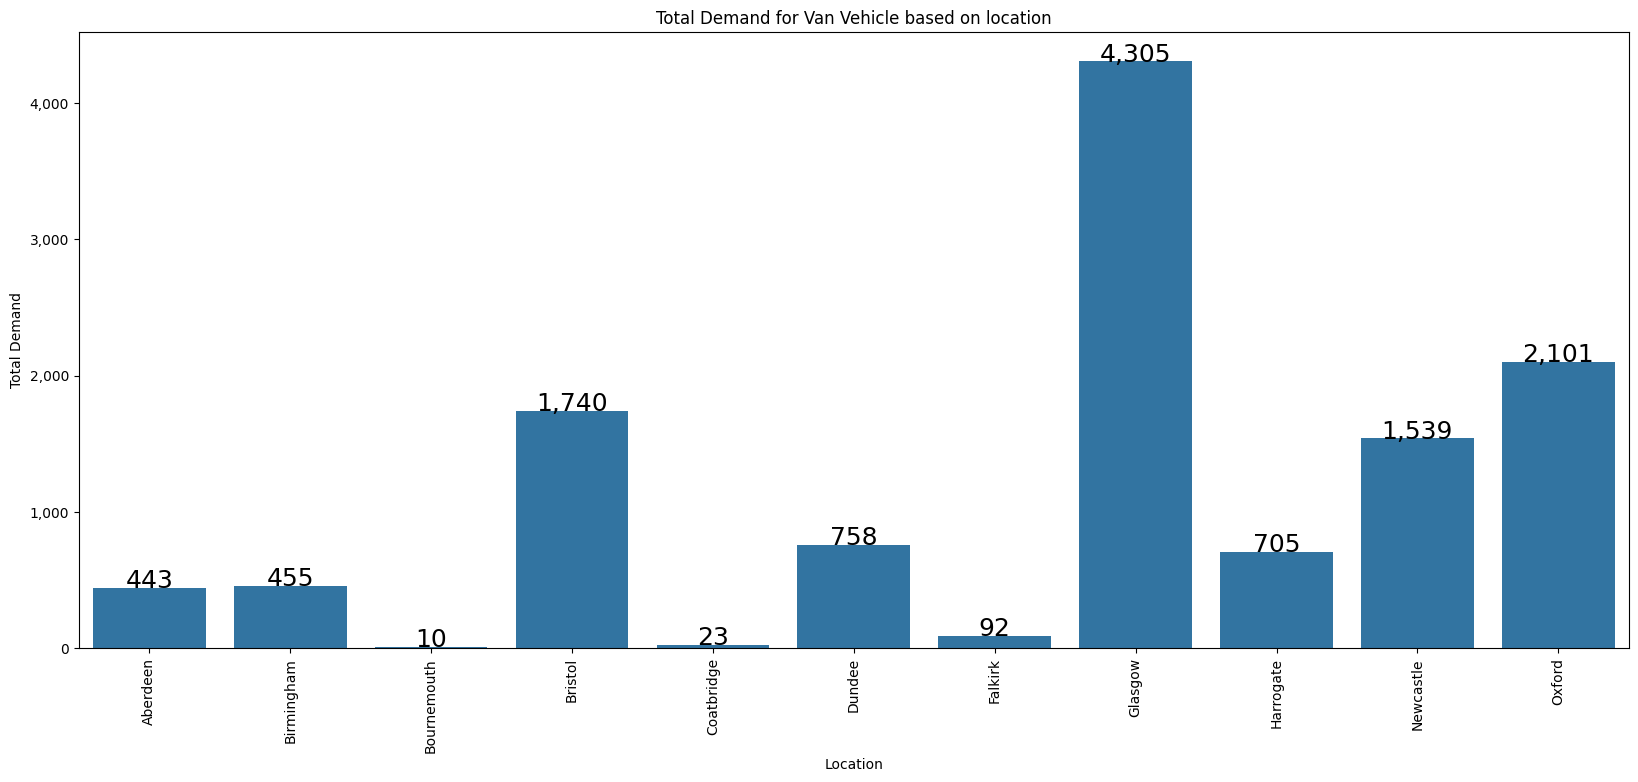

In [31]:
# Creating a bar plot - Van
plt.figure(figsize=(20, 8))
df_location_vehicle_demand_van = df_location_vehicle_demand[df_location_vehicle_demand['Vehicle Type'] == 'Van']
barplot = sns.barplot(x='location', y='booking_id', data=df_location_vehicle_demand_van)

# Adding title and labels
plt.title('Total Demand for Van Vehicle based on location')
plt.xlabel('Location')
plt.ylabel('Total Demand')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_vehicle_demand_van.iterrows():
    barplot.text(row['location'], row['booking_id'], f'{row["booking_id"]:,.0f}', color='black', ha="center", fontsize=18)

plt.xticks(rotation=90)

# Displaying the plot
plt.show()

# 6. Analyse - How far user booked their rides before using it?

Firstly, the `booking_lead_time` feature was created which is nothing but the difference between `booking_actual_start` and `booking_created_at` which shows that the time difference between the trip was actually started and the trip was booked. There was around `157` negative values, which is later converted into 0. The very negative value was deleted to overcome from bias.

In [32]:
dff = df.copy()

# convert to datetime
dff['booking_created_at'] = pd.to_datetime(dff['booking_created_at'])
dff['booking_actual_start'] = pd.to_datetime(dff['booking_actual_start'])

# check how far users booked their rides before using it : booking_actual_start - booking_created_at
dff['booking_lead_time'] =  dff['booking_actual_start'] - dff['booking_created_at']
dff['booking_lead_time'] = dff['booking_lead_time'].dt.total_seconds()
dff['booking_lead_time'] = dff['booking_lead_time']/60
dff.head()

vehicle_description vehicle_registration  \
0  RETIRED - White Toyota Aygo X-Play Nav (NL66 NKZ)             NL66 NKZ   
1                RETIRED - Renault Zoe EV (DL68 LNK)             DL68 LNK   
2  White Toyota Yaris Petrol Hybrid (Automatic) -...             ND19 HWY   
3      RETIRED - White Toyota Aygo X-Play (NL68 JVP)             NL68 JVP   
4  RETIRED - White Toyota Yaris Hybrid NJ68 JHV A...             NJ68 JHV   

  location                            booking_id booking_actual_start  \
0  Bristol  fc59ba9c-2ce9-11ea-8efc-bfa292f04054  2020-01-01 23:06:00   
1  Bristol  1cf7fae6-2ce7-11ea-a970-fbf7b3786523  2020-01-01 22:46:00   
2  Newbury  591b7a98-2cd8-11ea-a341-71665a42c0e8  2020-01-01 21:29:00   
3  Swindon  b6177928-2c55-11ea-a2e0-e9685b57c653  2020-01-01 21:22:00   
4  Horsham  9ffdc790-27ba-11ea-a36d-c540c1997f03  2020-01-01 22:02:00   

    booking_actual_end  booking_actual_duration booking_billed_start  \
0  2020-01-02 01:24:00                    138.0  2020-01-01 23:00:00   
1  2020-01-02 02:01:00                    195.0  2020-01-01 22:45:00   
2  2020-01-01 23:28:00                    119.0  2020-01-01 21:30:00   
3  2020-01-01 21:38:00                     16.0  2020-01-01 21:15:00   
4  2020-01-02 19:50:00                    733.0  2020-01-01 20:30:00   

   booking_billed_start_hour  booking_billed_start_dayofweek  \
0                         23                               2   
1                         22                               2   
2                         21                               2   
3                         21                               2   
4                         20                               2   

   booking_billed_start_month  booking_billed_start_year   booking_billed_end  \
0                           1                       2020  2020-01-02 08:00:00   
1                           1                       2020  2020-01-02 02:30:00   
2                           1                       2020  2020-01-01 23:30:00   
3                           1                       2020  2020-01-01 21:45:00   
4                           1                       2020  2020-01-02 20:30:00   

   booking_billed_end_hour  booking_billed_end_dayofweek  \
0                        8                             3   
1                        2                             3   
2                       23                             2   
3                       21                             2   
4                       20                             3   

   booking_billed_end_month  booking_billed_end_year  booking_billed_duration  \
0                         1                     2020                    540.0   
1                         1                     2020                    225.0   
2                         1                     2020                    120.0   
3                         1                     2020                     30.0   
4                         1                     2020                    915.0   

   booking_mileage  booking_rates_hours  booking_rates_24hours  \
0             82.0                  0.0                    0.0   
1              5.0                  0.0                    0.0   
2              6.0                  2.0                    0.0   
3              6.0                  0.5                    0.0   
4             53.0                  0.0                    1.0   

   booking_rates_overnight  booking_actual_cost_distance  \
0                      1.0                         14.76   
1                      1.0                          0.00   
2                      0.0                          1.08   
3                      0.0                          1.08   
4                      0.0                          9.54   

   booking_actual_cost_time  booking_actual_cost_total  booking_created_at  \
0                      9.50                      24.26 2020-01-01 22:56:00   
1                     11.00                      11.00 2020-01-0

In [33]:
dff['booking_lead_time'].describe()

count    378614.000000
mean       5186.907333
std       16657.207293
min     -508570.000000
25%          37.000000
50%         652.000000
75%        3632.000000
max      777187.000000
Name: booking_lead_time, dtype: float64

In [34]:
dff[dff['booking_lead_time'] < 0].count()

vehicle_description               157
vehicle_registration              157
location                          157
booking_id                        157
booking_actual_start              157
booking_actual_end                157
booking_actual_duration           157
booking_billed_start              157
booking_billed_start_hour         157
booking_billed_start_dayofweek    157
booking_billed_start_month        157
booking_billed_start_year         157
booking_billed_end                157
booking_billed_end_hour           157
booking_billed_end_dayofweek      157
booking_billed_end_month          157
booking_billed_end_year           157
booking_billed_duration           157
booking_mileage                   157
booking_rates_hours               157
booking_rates_24hours             157
booking_rates_overnight           157
booking_actual_cost_distance      157
booking_actual_cost_time          157
booking_actual_cost_total         157
booking_created_at                157
booking_created_at_hour           157
booking_created_at_dayofweek      157
booking_created_at_month          157
booking_created_at_year           157
season                            157
is_holiday                        157
Vehicle Type                      157
Fuel Type                         157
hourly_rate                       157
daily_rate                        157
per_mile                          157
booking_lead_time                 157
dtype: int64

In [35]:
dff[dff['booking_lead_time'] < 0].head()

vehicle_description vehicle_registration  \
1240              RETIRED - Toyota Yaris 1.5 (NA17 WDE)             NA17 WDE   
3734     RETIRED - White Toyota Yaris Hybrid (NK68 YTA)             NK68 YTA   
5570  RETIRED - White Toyota Yaris Hybrid NJ68 JHO A...             NJ68 JHO   
5644          RETIRED - White Renault Zoe EV (NX69 YMZ)             NX69 YMZ   
5658           RETIRED - Toyota Yaris Hybrid (ND66 ULC)             ND66 ULC   

           location                            booking_id  \
1240         Oxford  d35a4c88-2410-11ea-a1c7-850379dfe4df   
3734  Isle-of-Wight  ef15ea62-139a-11ea-ab38-df0233f4c36f   
5570         Putney  b8875530-07c4-11ea-822f-9184b9c61911   
5644        Glasgow  ed6fd0a8-0754-11ea-83fe-6134cf5e05c8   
5658          Derby  11e9ffa0-0717-11ea-8c7c-71aec961344a   

     booking_actual_start   booking_actual_end  booking_actual_duration  \
1240  2019-12-21 16:39:00  2019-12-21 18:01:00                     82.0   
3734  2019-11-30 17:49:00  2019-11-30 18:19:00                     30.0   
5570  2019-11-15 16:22:00  2019-11-15 17:19:00                     57.0   
5644  2019-11-15 02:25:00  2019-11-15 05:31:00                    186.0   
5658  2019-11-14 17:19:00  2019-11-14 22:48:00                    329.0   

     booking_billed_start  booking_billed_start_hour  \
1240  2019-12-21 16:30:00                         16   
3734  2019-11-30 17:45:00                         17   
5570  2019-11-15 16:30:00                         16   
5644  2019-11-15 02:30:00                          2   
5658  2019-11-14 17:15:00                         17   

      booking_billed_start_dayofweek  booking_billed_start_month  \
1240                               5                          12   
3734                               5                          11   
5570                               4                          11   
5644                               4                          11   
5658                               3                          11   

      booking_billed_start_year   booking_billed_end  booking_billed_end_hour  \
1240                       2019  2019-12-21 18:30:00                       18   
3734                       2019  2019-11-30 19:00:00                       19   
5570                       2019  2019-11-15 18:00:00                       18   
5644                       2019  2019-11-15 08:00:00                        8   
5658                       2019  2019-11-15 08:00:00                        8   

      booking_billed_end_dayofweek  booking_billed_end_month  \
1240                             5                        12   
3734                             5                        11   
5570                             4                        11   
5644                             4                        11   
5658                             4                        11   

      booking_billed_end_year  booking_billed_duration  booking_mileage  \
1240                     2019                    120.0             61.0   
3734                     2019                     75.0              6.0   
5570                     2019                     90.0              8.0   
5644                     2019                    330.0             50.0   
5658                     2019                    885.0             34.0   

      booking_rates_hours  booking_rates_24hours  booking_rates_overnight  \
1240                 2.00                    0.0                      0.0   
3734                 1.25                    0.0                      0.0   
5570                 1.50                    0.0                      0.0   
5644                 0.00                    0.0                      1.0   
5658                 2.75                    0.0                      1.0   

      booking_actual_cost_distance  booking_actual_cost_time  \
1240                         10.98                     11.00   
3734                          1.08                      6.88   
5570         

In [36]:
dff[dff['booking_lead_time'] < 0].tail()

vehicle_description  \
377268  White Toyota Yaris Petrol Hybrid (Automatic) -...   
377354  White Toyota Yaris Petrol Hybrid (Automatic) -...   
377749              Blue MG 3 Petrol (Manual)  - LD21 XSJ   
377760  White MG 4 Electric Vehicle (Automatic) - FL23...   
377884  White MG 4 Electric Vehicle (Automatic) - FL23...   

       vehicle_registration         location  \
377268             DL23 KZP           Oxford   
377354             DL23 BXN  Tunbridge Wells   
377749             LD21 XSJ          Bristol   
377760             FL23 HHD         Aberdeen   
377884             FL23 HGP        Gateshead   

                                  booking_id booking_actual_start  \
377268  762293b2-ae4b-11ee-91e0-854a4f234f4d  2024-01-08 17:26:00   
377354  e03f2fc8-ae12-11ee-b013-d5751107e43d  2024-01-08 10:40:00   
377749  ae39a13a-ac8b-11ee-9925-2fb13b4a1361  2024-01-06 11:55:00   
377760  877f0286-ac88-11ee-97d1-43255777218f  2024-01-06 11:40:00   
377884  52757a14-ac58-11ee-8655-abccb882f94a  2024-01-06 05:55:00   

         booking_actual_end  booking_actual_duration booking_billed_start  \
377268  2024-01-08 20:01:00                    155.0  2024-01-08 17:30:00   
377354  2024-01-08 12:39:00                    119.0  2024-01-08 10:30:00   
377749  2024-01-06 15:59:00                    244.0  2024-01-06 12:00:00   
377760  2024-01-06 12:09:00                     29.0  2024-01-06 11:45:00   
377884  2024-01-06 07:44:00                    109.0  2024-01-06 06:00:00   

        booking_billed_start_hour  booking_billed_start_dayofweek  \
377268                         17                               0   
377354                         10                               0   
377749                         12                               5   
377760                         11                               5   
377884                          6                               5   

        booking_billed_start_month  booking_billed_start_year  \
377268                           1                       2024   
377354                           1                       2024   
377749                           1                       2024   
377760                           1                       2024   
377884                           1                       2024   

         booking_billed_end  booking_billed_end_hour  \
377268  2024-01-08 20:15:00                       20   
377354  2024-01-08 13:00:00                       13   
377749  2024-01-06 16:00:00                       16   
377760  2024-01-06 12:15:00                       12   
377884  2024-01-06 07:45:00                        7   

        booking_billed_end_dayofweek  booking_billed_end_month  \
377268                             0                         1   
377354                             0                         1   
377749                             5                         1   
377760                             5                         1   
377884                             5                         1   

        booking_billed_end_year  booking_billed_duration  booking_mileage  \
377268                     2024                    165.0             21.0   
377354                     2024                    150.0              7.0   
377749                     2024                    240.0             16.0   
377760                     2024                     30.0              4.0   
377884                     2024                    105.0             19.0   

        booking_rates_hours  booking_rates_24hours  booking_rates_overnight  \
377268                 2.75                    0.0                      0.0   
377354                 2.50                    0.0                      0.0   
377749                 4.00                    0.0                      0.0   
377760                 0.50                    0.0                      0.0   
377884                 1.75                    0.0                      0.0   

        booking_actual_cos

In [37]:
# Condition to filter rows where 'booking_lead_time' is less than -500
condition = dff['booking_lead_time'] <= -500

# Drop rows that meet the condition
indexes_to_drop = dff[condition].index
dff.drop(indexes_to_drop, inplace=True)

# Reset index if needed
dff.reset_index(drop=True, inplace=True)

In [38]:
# Define the condition for updating the column
condition = (dff['booking_lead_time'] > -500) & (dff['booking_lead_time'] < 0)

# Update the column values based on the condition
dff.loc[condition, 'booking_lead_time'] = 0

## 6.1. Correlation Analysis

### 6.1.1. Are shorter or longer bookings planned further in advance?



From the plot, a few observations can be made:

1. **Dense Region Near Origin**: There is a dense cluster of points near the origin, indicating a `large number of bookings with both short lead times and short durations.`

2. **Wide Spread**: There is a significant spread in both directions, with lead times ranging up to 800,000 hours and durations up to 750 minutes. This wide spread suggests that while `most bookings are made with shorter lead times and for shorter durations`.

3. **Pattern**: There is a discernible pattern where longer booking durations generally correspond to longer lead times, but `this pattern is not very strong`, as `correlation coefficient is only around 0.224`.

To summarize:
- There is a weak positive correlation between `booking_lead_time` and `booking_actual_duration`.
- Most bookings have `shorter lead times and durations`.

In [39]:
# Calculate correlation
correlation = dff["booking_lead_time"].corr(dff["booking_actual_duration"])
print('Correlation between booking_lead_time and booking_actual_duration', np.round(correlation, 3))

Correlation between booking_lead_time and booking_actual_duration 0.224


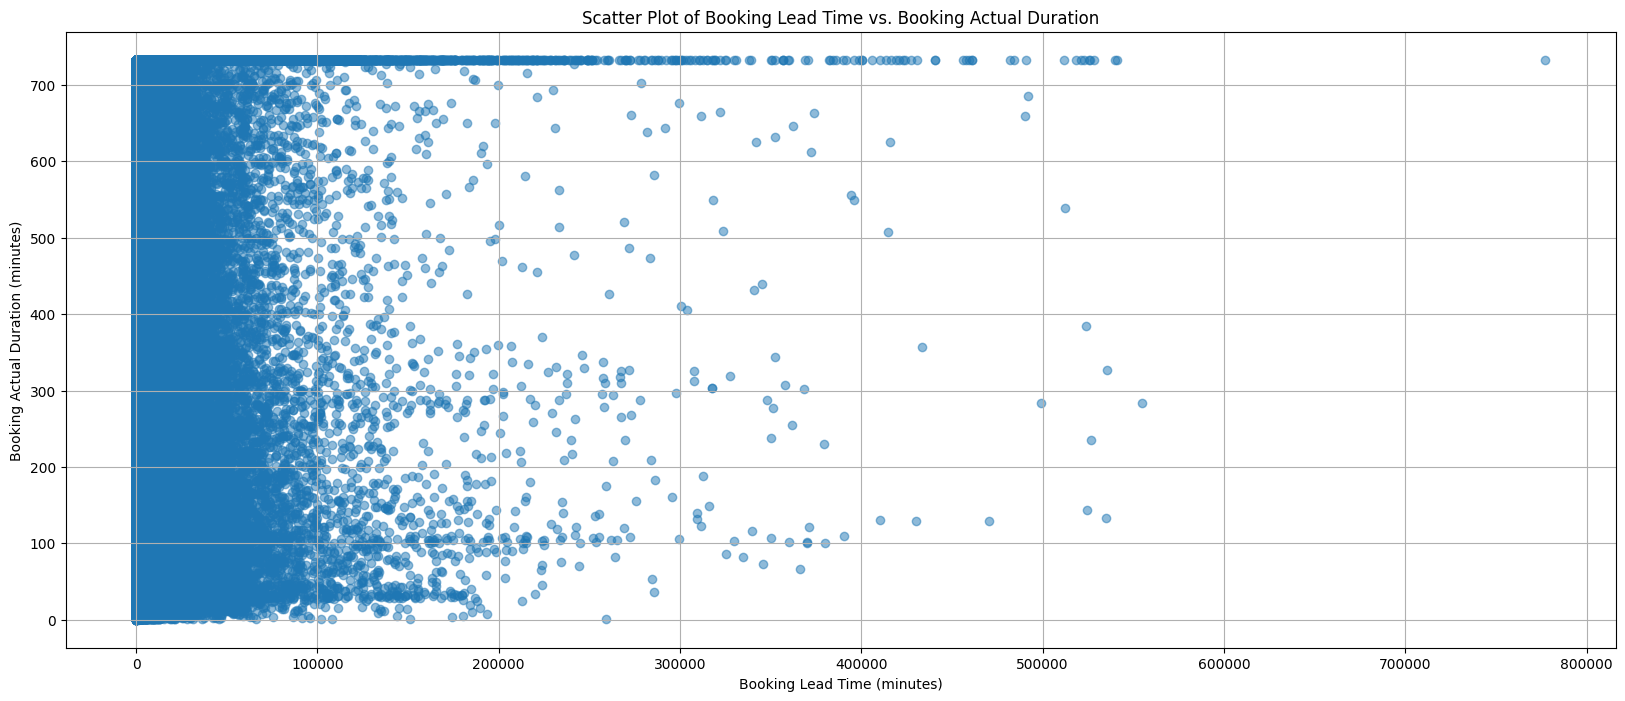

In [40]:
# Scatter plot
plt.figure(figsize=(20, 8))
plt.scatter(dff["booking_lead_time"], dff["booking_actual_duration"], alpha=0.5)
plt.title("Scatter Plot of Booking Lead Time vs. Booking Actual Duration")
plt.xlabel("Booking Lead Time (minutes)")
plt.ylabel("Booking Actual Duration (minutes)")
plt.grid(True)
plt.show()

### 6.1.2. Is there a correlation between the total cost and the lead time?

Bookings made very far in advance (higher lead times) don't consistently correspond to higher or lower costs. Hence the `correlation coefficient (around 0.245)` is the same as for previous.

In [41]:
# Calculate correlation
correlation_cost_lead_time = dff["booking_actual_cost_total"].corr(dff["booking_lead_time"])
print('Correlation between booking_lead_time and booking_actual_cost_total: ', np.round(correlation_cost_lead_time, 3))

Correlation between booking_lead_time and booking_actual_cost_total:  0.245


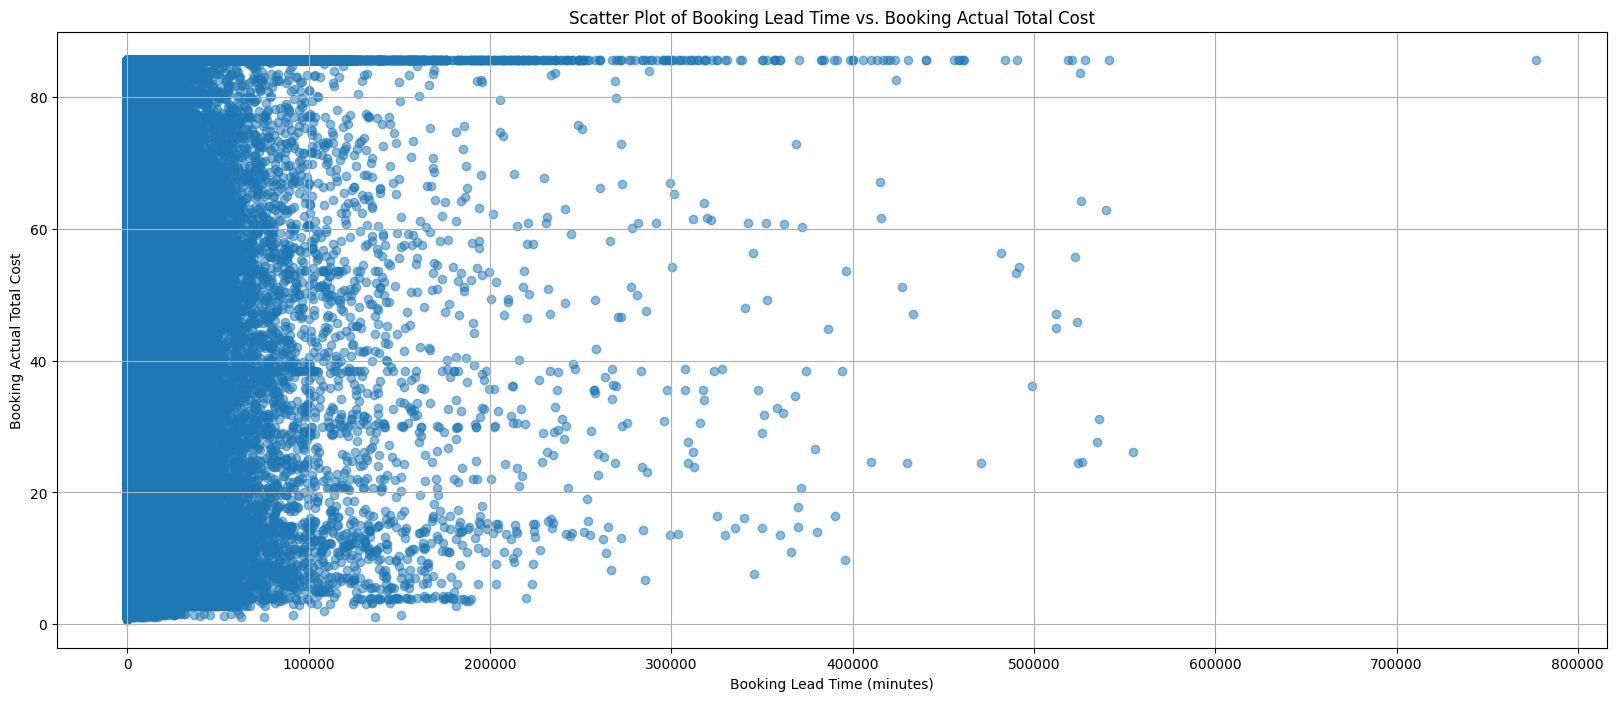

In [42]:
plt.figure(figsize=(20, 8))
plt.scatter(dff["booking_lead_time"], dff["booking_actual_cost_total"], alpha=0.5)
plt.title("Scatter Plot of Booking Lead Time vs. Booking Actual Total Cost")
plt.xlabel("Booking Lead Time (minutes)")
plt.ylabel("Booking Actual Total Cost")
plt.grid(True)
plt.show()

In [43]:
dff.head()

vehicle_description vehicle_registration  \
0  RETIRED - White Toyota Aygo X-Play Nav (NL66 NKZ)             NL66 NKZ   
1                RETIRED - Renault Zoe EV (DL68 LNK)             DL68 LNK   
2  White Toyota Yaris Petrol Hybrid (Automatic) -...             ND19 HWY   
3      RETIRED - White Toyota Aygo X-Play (NL68 JVP)             NL68 JVP   
4  RETIRED - White Toyota Yaris Hybrid NJ68 JHV A...             NJ68 JHV   

  location                            booking_id booking_actual_start  \
0  Bristol  fc59ba9c-2ce9-11ea-8efc-bfa292f04054  2020-01-01 23:06:00   
1  Bristol  1cf7fae6-2ce7-11ea-a970-fbf7b3786523  2020-01-01 22:46:00   
2  Newbury  591b7a98-2cd8-11ea-a341-71665a42c0e8  2020-01-01 21:29:00   
3  Swindon  b6177928-2c55-11ea-a2e0-e9685b57c653  2020-01-01 21:22:00   
4  Horsham  9ffdc790-27ba-11ea-a36d-c540c1997f03  2020-01-01 22:02:00   

    booking_actual_end  booking_actual_duration booking_billed_start  \
0  2020-01-02 01:24:00                    138.0  2020-01-01 23:00:00   
1  2020-01-02 02:01:00                    195.0  2020-01-01 22:45:00   
2  2020-01-01 23:28:00                    119.0  2020-01-01 21:30:00   
3  2020-01-01 21:38:00                     16.0  2020-01-01 21:15:00   
4  2020-01-02 19:50:00                    733.0  2020-01-01 20:30:00   

   booking_billed_start_hour  booking_billed_start_dayofweek  \
0                         23                               2   
1                         22                               2   
2                         21                               2   
3                         21                               2   
4                         20                               2   

   booking_billed_start_month  booking_billed_start_year   booking_billed_end  \
0                           1                       2020  2020-01-02 08:00:00   
1                           1                       2020  2020-01-02 02:30:00   
2                           1                       2020  2020-01-01 23:30:00   
3                           1                       2020  2020-01-01 21:45:00   
4                           1                       2020  2020-01-02 20:30:00   

   booking_billed_end_hour  booking_billed_end_dayofweek  \
0                        8                             3   
1                        2                             3   
2                       23                             2   
3                       21                             2   
4                       20                             3   

   booking_billed_end_month  booking_billed_end_year  booking_billed_duration  \
0                         1                     2020                    540.0   
1                         1                     2020                    225.0   
2                         1                     2020                    120.0   
3                         1                     2020                     30.0   
4                         1                     2020                    915.0   

   booking_mileage  booking_rates_hours  booking_rates_24hours  \
0             82.0                  0.0                    0.0   
1              5.0                  0.0                    0.0   
2              6.0                  2.0                    0.0   
3              6.0                  0.5                    0.0   
4             53.0                  0.0                    1.0   

   booking_rates_overnight  booking_actual_cost_distance  \
0                      1.0                         14.76   
1                      1.0                          0.00   
2                      0.0                          1.08   
3                      0.0                          1.08   
4                      0.0                          9.54   

   booking_actual_cost_time  booking_actual_cost_total  booking_created_at  \
0                      9.50                      24.26 2020-01-01 22:56:00   
1                     11.00                      11.00 2020-01-0

### 6.1.3. Analyse - booking lead times vary during different seasons or between holidays and non-holidays.

#### 6.1.3.1. Season

The bar chart illustrates the `average booking lead time (in minutes) across different seasons`, revealing distinct seasonal patterns in advance booking behavior. **Autumn** leads with the 'highest average lead time at **5721.26 minutes'**, **_suggesting that customers tend to book significantly in advance during this season_**. **Summer and Spring** follow with average lead times of **5451.82 and 5112.49 minutes**, respectively, **_indicating moderately high lead times_**. **Winter**, with the lowest average lead time of **4124.55 minutes**, **_shows that bookings are made relatively closer to the travel date in this season_**. These variations could be influenced by factors such as holiday planning, weather conditions, and seasonal demand trends, highlighting the importance of seasonality in booking behaviors.

In [44]:
# Group by season and holiday
seasonal_lead_times = dff.groupby('season')['booking_lead_time'].mean()
seasonal_lead_times.head()

season
Autumn    5721.259201
Spring    5112.486765
Summer    5451.822509
Winter    4124.552345
Name: booking_lead_time, dtype: float64

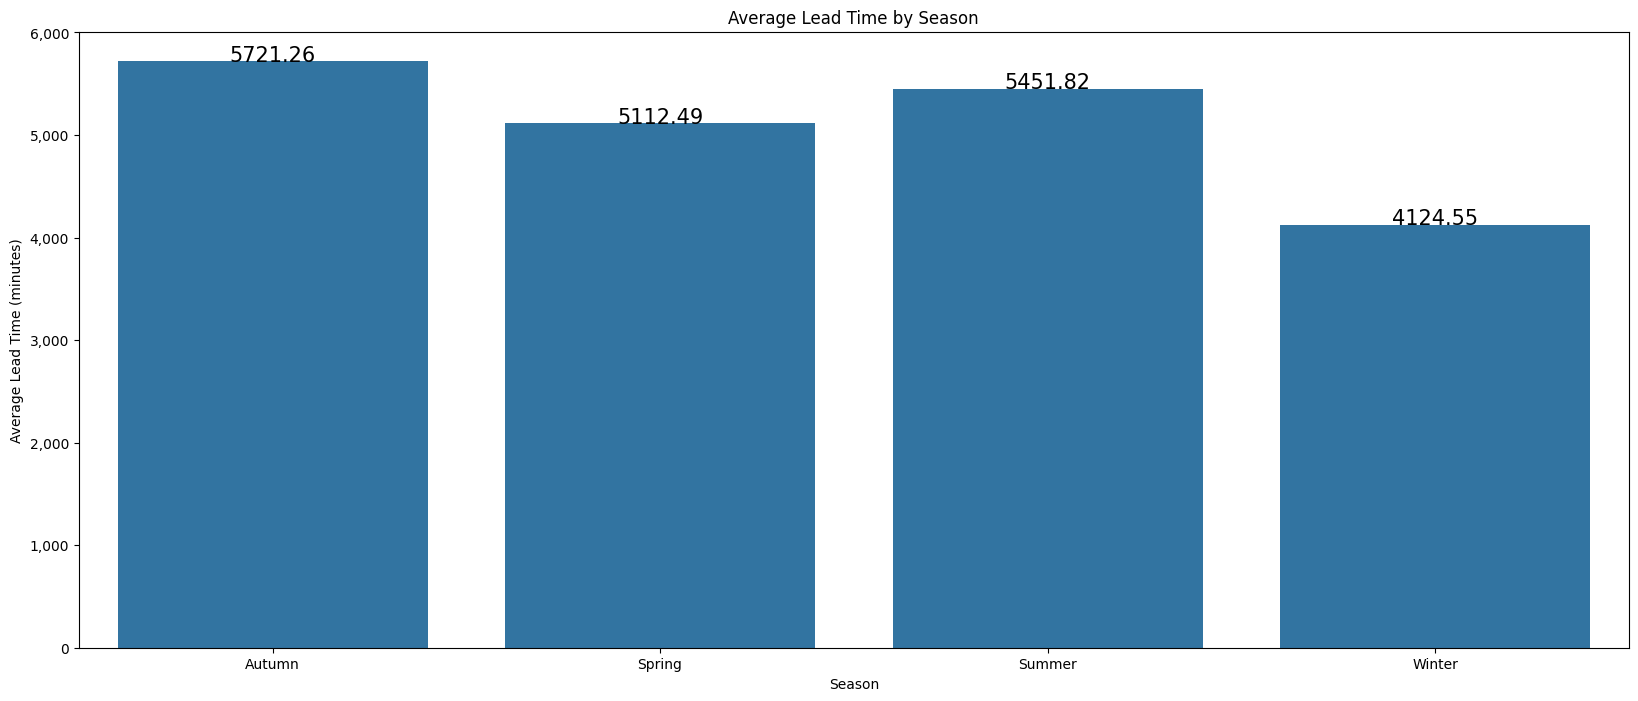

In [45]:
df_seasonal_lead_times = pd.DataFrame(seasonal_lead_times)
df_seasonal_lead_times['season'] = df_seasonal_lead_times.index

# bar plot
plt.figure(figsize=(20, 8))
barplot = sns.barplot(x='season', y='booking_lead_time', data=df_seasonal_lead_times)
plt.title('Average Lead Time by Season')
plt.xlabel('Season')
plt.ylabel('Average Lead Time (minutes)')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_seasonal_lead_times.iterrows():
    barplot.text(index, row['booking_lead_time'], f'{row["booking_lead_time"]:.2f}', color='black', ha="center", fontsize=15)

plt.show()

#### 6.1.3.2. Holiday or Non-holiday

The `t-test results` provide a _quantitative measure_ of **the difference in booking lead times between holidays and non-holidays**. The `t-statistic` of `18.19` _**indicates a substantial difference in the means of the two groups**_. The corresponding `p-value of 4.40e-73` is **exceptionally low**, far below _any common significance threshold (e.g., 0.05)_. This **low p-value** suggests that **the observed difference in booking lead times is highly statistically significant**, implying that **_there is a very low probability that this difference occurred by random chance._**

The bar chart further illustrates this difference visually. It shows that **the average booking lead time for non-holidays is _5014.32 minutes_**, while for holidays, it is **significantly higher at _9876.00 minutes_**. This stark contrast highlights that customers tend **to book their reservations much further in advance for holidays compared to non-holidays**. This behavior is likely driven by the increased demand and the necessity to secure bookings earlier during holiday periods. Together, the t-test and the bar chart provide compelling evidence of the significant difference in booking behaviors between holidays and non-holidays.

In [46]:
is_holiday_lead_times = dff.groupby('is_holiday')['booking_lead_time'].mean()
is_holiday_lead_times.head()

is_holiday
0    5014.317302
1    9875.996235
Name: booking_lead_time, dtype: float64

In [47]:
from scipy.stats import ttest_ind

# Split data into holiday and non-holiday groups
holiday_lead_times = dff[dff['is_holiday'] == 1]['booking_lead_time']
non_holiday_lead_times = dff[dff['is_holiday'] == 0]['booking_lead_time']

# Perform t-test
t_stat, p_value = ttest_ind(holiday_lead_times, non_holiday_lead_times, equal_var=False)

# Display results
f"t-statistic: {t_stat}, p-value: {p_value}"

't-statistic: 18.190141912459058, p-value: 4.3975768127168376e-73'

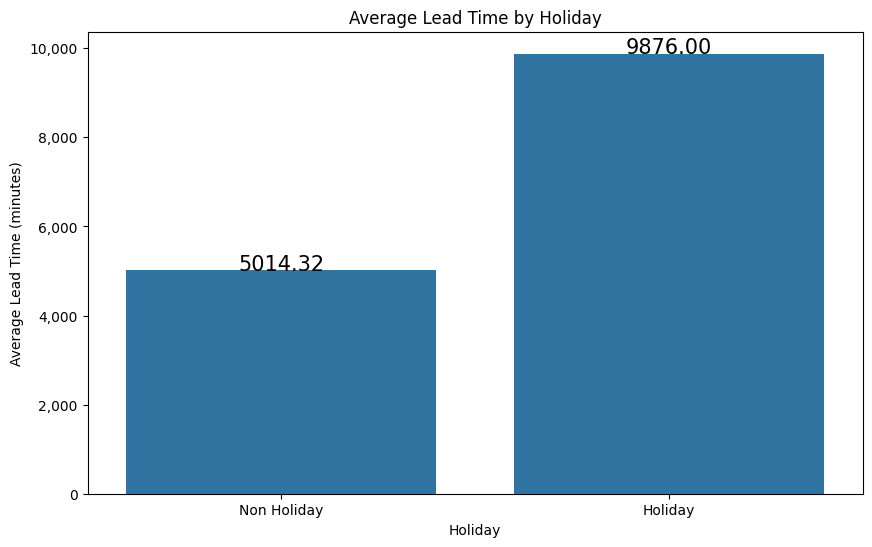

In [48]:
df_holiday_lead_times = pd.DataFrame(is_holiday_lead_times)
df_holiday_lead_times['is_holiday'] = df_holiday_lead_times.index

# bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='is_holiday', y='booking_lead_time', data=df_holiday_lead_times)
# New x-axis labels
new_labels = ['Non Holiday', 'Holiday']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)
plt.title('Average Lead Time by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Average Lead Time (minutes)')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_holiday_lead_times.iterrows():
    barplot.text(index, row['booking_lead_time'], f'{row["booking_lead_time"]:.2f}', color='black', ha="center", fontsize=15)

plt.show()

### 6.1.4. Examine if different types of vehicles or fuel types influence how far in advance bookings are made.

#### 6.1.4.1. Vehicle Type

The bar chart depicts the `average booking lead times in minutes for different vehicle types`. The lead times vary across these types, _indicating differences in how far in advance customers tend to book different kinds of vehicles._

- **7 Seater**: Average lead time is 5767.53 minutes.
- **City**: Average lead time is 4403.75 minutes, the shortest among all vehicle types.
- **Everyday**: Average lead time is 5008.83 minutes.
- **Family**: Average lead time is 6069.71 minutes, the longest among all vehicle types.
- **Van**: Average lead time is 4986.37 minutes.

The chart suggests that customers tend to book Family and 7 Seater vehicles further in advance compared to City vehicles, which are booked closer to the usage date. This variability in booking lead times across vehicle types may be influenced by factors such as the intended use, availability, and customer preferences for planning.

These observations highlight the significant differences in booking behaviors across various vehicle categories, emphasizing the need for different strategies in managing bookings and inventory for different vehicle types.

In [49]:
df_vehicle_type_lead_times = pd.DataFrame(dff.groupby('Vehicle Type')['booking_lead_time'].mean())
df_vehicle_type_lead_times['Vehicle Type'] = df_vehicle_type_lead_times.index

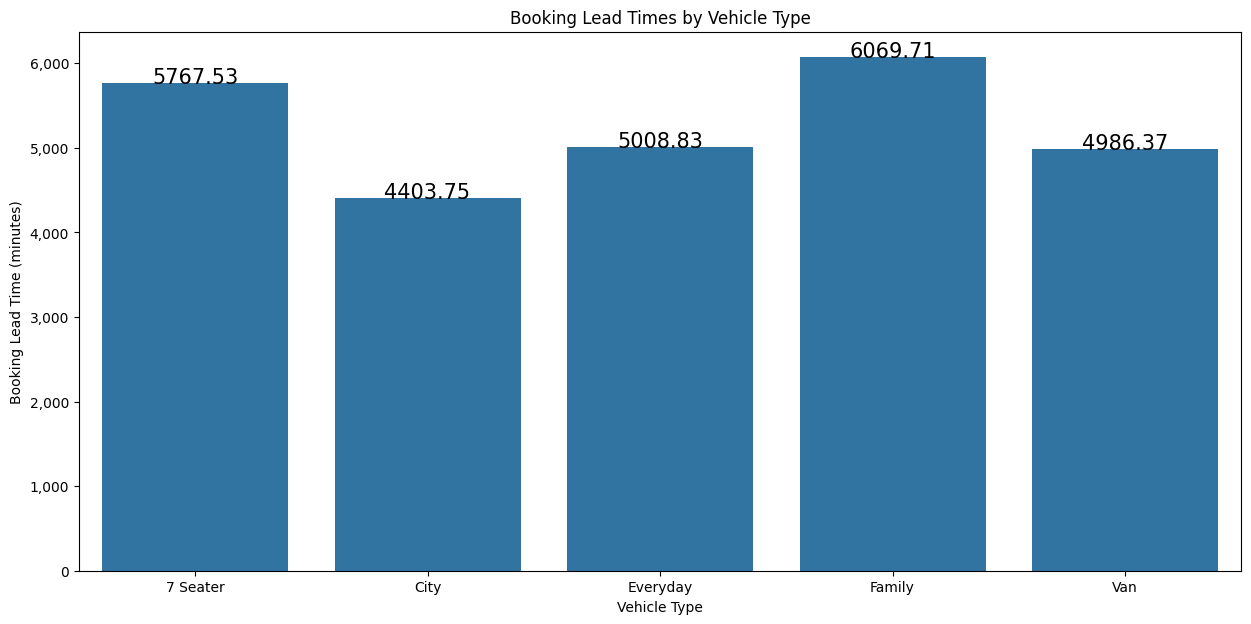

In [50]:
# Vehicle Type for booking_lead_time
plt.figure(figsize=(15, 7))
barplot = sns.barplot(x='Vehicle Type', y='booking_lead_time', data=df_vehicle_type_lead_times)
plt.title('Booking Lead Times by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Booking Lead Time (minutes)')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_vehicle_type_lead_times.iterrows():
    barplot.text(row['Vehicle Type'], row["booking_lead_time"], f'{row["booking_lead_time"]:.2f}', color='black', ha="center", fontsize=15)

plt.show()

#### 6.1.4.2. Fuel Type

The bar chart illustrates the `average booking lead times in minutes for different fuel types`, revealing significant variability in how far in advance customers book vehicles based on their fuel type.

For `Electric Vehicles (EVs)`, the **average lead time is 4420.45 minutes**. _This relatively high lead time suggests that customers tend to plan and book EVs well in advance_, possibly due to a combination of _higher demand or fewer available units of EVs_ compared to traditional fuel types.

`Hydrogen-fueled vehicles` have an **average lead time of only 696.14 minutes**. This much _shorter lead time_ **indicates that customers tend to book these vehicles closer to the usage date**. The limited infrastructure for hydrogen fueling and the relatively lower market penetration might contribute to the less advance planning for these vehicles.

`Petrol vehicles` have the **highest average lead time at 5449.65 minutes**. _This indicates that petrol vehicles are in **high demand** and are likely booked well in advance_. **The extensive availability of petrol vehicles and the familiarity customers have with them could be factors contributing to this longer lead time.**

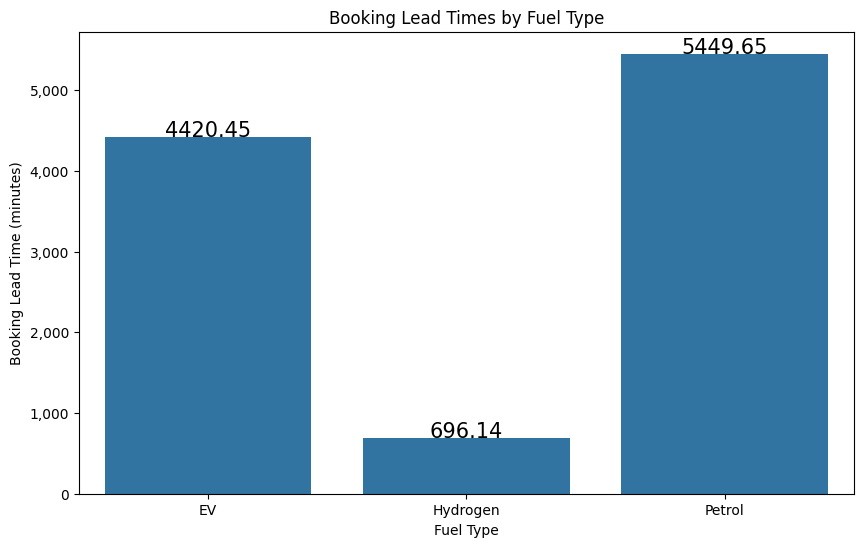

In [51]:
df_fuel_type_lead_times = pd.DataFrame(dff.groupby('Fuel Type')['booking_lead_time'].mean())
df_fuel_type_lead_times['Fuel Type'] = df_fuel_type_lead_times.index

# Set up the figure size for fuel type
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Fuel Type', y='booking_lead_time', data=df_fuel_type_lead_times)
plt.title('Booking Lead Times by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Booking Lead Time (minutes)')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_fuel_type_lead_times.iterrows():
    barplot.text(index, row['booking_lead_time'], f'{row["booking_lead_time"]:.2f}', color='black', ha="center", fontsize=15)

plt.show()

### 6.1.5. Examine if lead times vary significantly across different locations

The bar chart depicts the `average booking lead times in minutes for various locations`, demonstrating significant variability across different areas. Locations such as **Oxenholme and Penrith show exceptionally high lead times**, with **averages of 29,777.58 and 27,821.46 minutes**, respectively. Conversely, locations like **Exeter and Banbury** exhibit much **shorter lead times, around 104 and 487.69 minutes**, respectively. This variation suggests that _booking behaviors differ widely depending on the location, which could be influenced by factors such as local demand, availability of vehicles, and regional customer planning habits_. Understanding these differences can help rental companies tailor their inventory and marketing strategies to better meet the specific needs of each location.

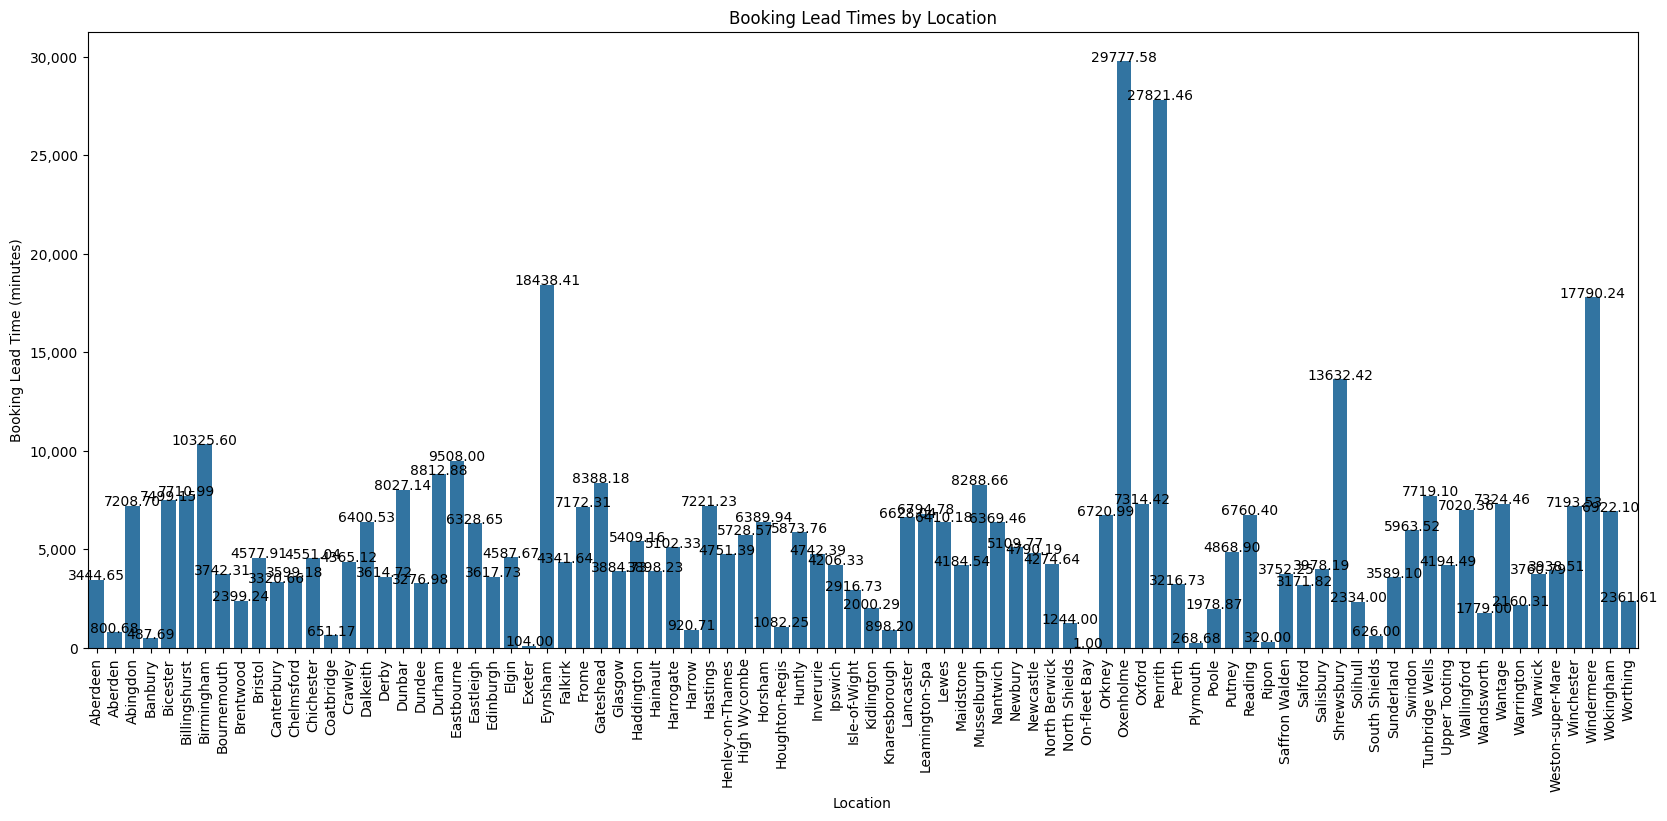

In [52]:
df_location_lead_times = pd.DataFrame(dff.groupby('location')['booking_lead_time'].mean())
df_location_lead_times['location'] = df_location_lead_times.index

# Set up the figure size for location
plt.figure(figsize=(20, 8))
barplot = sns.barplot(x='location', y='booking_lead_time', data=df_location_lead_times)
plt.title('Booking Lead Times by Location')
plt.xlabel('Location')
plt.ylabel('Booking Lead Time (minutes)')

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Adding the actual values above each bar
for index, row in df_location_lead_times.iterrows():
    barplot.text(index, row['booking_lead_time'], f'{row["booking_lead_time"]:.2f}', color='black', ha="center")

plt.xticks(rotation=90)

plt.show()

# 7. Calculate Seasonality

The line chart displays **three key revenue metrics over the years**, with values annotated for each year. Here are the key observations:

1. **Total Distance Revenue (red line)**:
   - The total distance revenue starts at £541 in 2018 and shows a gradual increase, reaching £190,918 in 2019.
   - The trend continues upward, with £198,350 in 2020 and £334,546 in 2021.
   - By 2022, the distance revenue peaks at £449,705, followed by a slight increase to £460,633 in 2023, before declining to £158,691 in 2024 for half year.

2. **Total Time Revenue (purple line)**:
   - Time revenue begins at £2,317 in 2018 and rises significantly to £819,636 in 2019.
   - The growth continues with £945,659 in 2020 and £1,765,651 in 2021.
   - The highest revenue is recorded in 2022 at £2,164,827, remaining stable in 2023 at £2,165,118, before dropping to £725,483 in 2024 for half year.

3. **Total Revenue (green line)**:
   - Starting at £3,004 in 2018, total revenue rises sharply to £1,050,934 in 2019.
   - The upward trend persists with £1,189,102 in 2020, and a significant increase to £2,179,175 in 2021.
   - The peak revenue is observed in 2022 at £2,710,375, slightly increasing to £2,723,238 in 2023, before dropping dramatically to £912,258 in 2024 for half year.

4. **Total Demand (black line)**:
    - Starting at 104 in 2018, total bookings rises sharply to 40,697 in 2019.
    - The upward trend persists with 49,221 in 2020, and a significant increase to 84,058 in 2021.
    - The peak in demand (total bookings) is observed in 2022 at 88,497, slightly decreased to 85,877 in 2023, before dropping dramatically to 30,160 in 2024 for half year.

### Interpretation

- **Growth Phase (2018-2022)**: The initial years show a robust upward trend in all revenue metrics. This period reflects business expansion and increased customer usage, with both distance and time-based revenues contributing significantly to total revenue growth.

- The chart shows that the revenue generated over time significantly influences the total revenue. This indicates that increasing the total revenue relies more on the time-related costs than on the distance-related costs.

In [53]:
# Group by year
yearly_data = df.groupby('booking_billed_start_year').agg(
    total_bookings=pd.NamedAgg(column='booking_id', aggfunc='count'),
    total_duration=pd.NamedAgg(column='booking_actual_duration', aggfunc='sum'),
    total_distance_revenue=pd.NamedAgg(column='booking_actual_cost_distance', aggfunc='sum'),
    total_time_revenue=pd.NamedAgg(column='booking_actual_cost_time', aggfunc='sum'),
    total_revenue=pd.NamedAgg(column='booking_actual_cost_total', aggfunc='sum')
).reset_index()

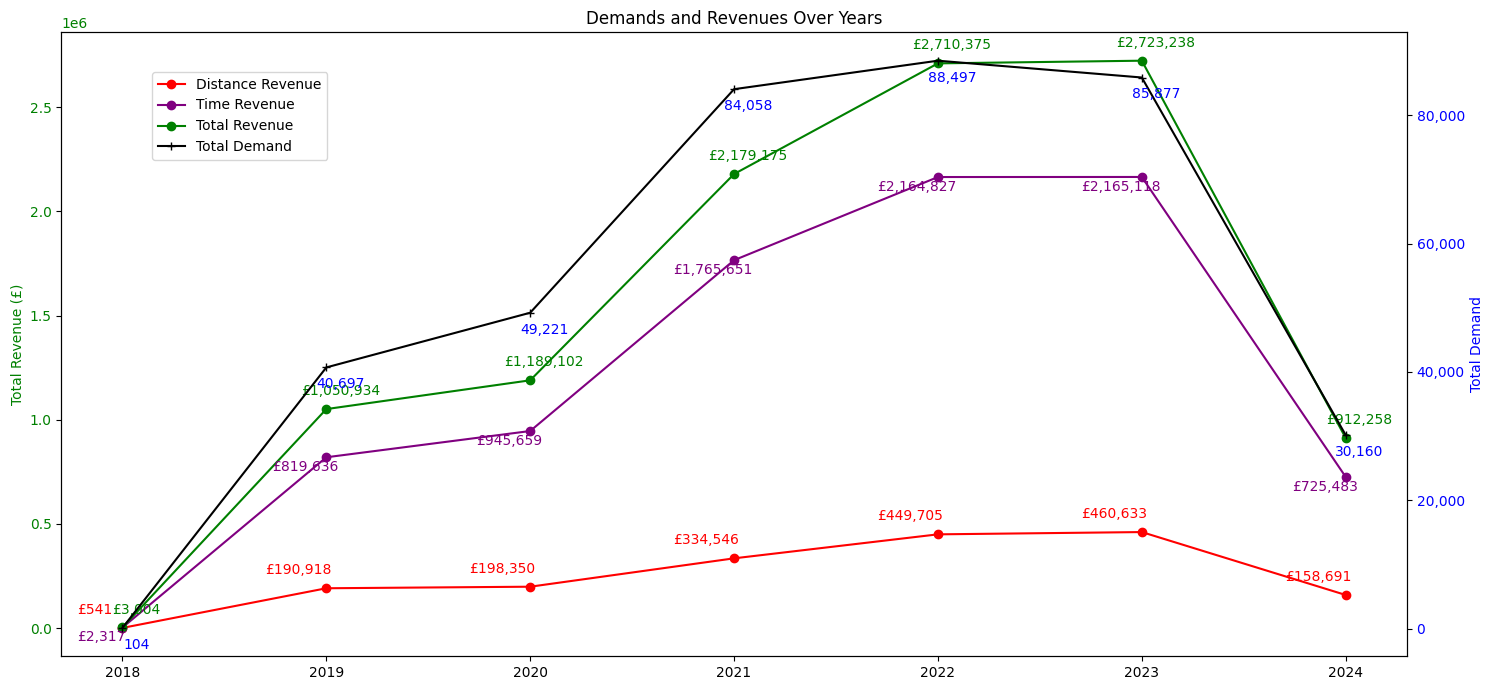

In [54]:
# Plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Line plot for total distance revenue
ax1.plot(yearly_data['booking_billed_start_year'], yearly_data['total_distance_revenue'], color='red', marker='o', label='Distance Revenue')
for i, txt in enumerate(yearly_data['total_distance_revenue']):
    ax1.annotate(f'£{txt:,.0f}', (yearly_data['booking_billed_start_year'][i], yearly_data['total_distance_revenue'][i]), textcoords="offset points", xytext=(-20,10), ha='center', color='red')

# Line plot for total time revenue
ax1.plot(yearly_data['booking_billed_start_year'], yearly_data['total_time_revenue'], color='purple', marker='o', label='Time Revenue')
for i, txt in enumerate(yearly_data['total_time_revenue']):
    ax1.annotate(f'£{txt:,.0f}', (yearly_data['booking_billed_start_year'][i], yearly_data['total_time_revenue'][i]), textcoords="offset points", xytext=(-15,-10), ha='center', color='purple')

# Line plot for total revenue
ax1.plot(yearly_data['booking_billed_start_year'], yearly_data['total_revenue'], color='green', marker='o', label='Total Revenue')
for i, txt in enumerate(yearly_data['total_revenue']):
    ax1.annotate(f'£{txt:,.0f}', (yearly_data['booking_billed_start_year'][i], yearly_data['total_revenue'][i]), textcoords="offset points", xytext=(10,10), ha='center', color='green')

ax1.set_ylabel('Total Revenue (£)', color='green')
ax1.tick_params(axis='y', labelcolor='green')


# Secondary y-axis for demand
ax2 = ax1.twinx()
ax2.plot(yearly_data['booking_billed_start_year'], yearly_data['total_bookings'], color='black', marker='+', label='Total Demand')
for i, txt in enumerate(yearly_data['total_bookings']):
    ax2.annotate(f'{txt:,}', (yearly_data['booking_billed_start_year'][i], yearly_data['total_bookings'][i]), textcoords="offset points", xytext=(10,-15), ha='center', color='blue')

ax2.set_ylabel('Total Demand', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


# Adding title and legend
plt.title('Demands and Revenues Over Years')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

# Formatting the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

plt.show()

The line chart shows `the trend in revenue per booking from 2018 to 2024`.

In `2018`, the revenue per booking was `£28.89`, but it declined to `£25.82 in 2019` and further to `£24.16 in 2020`. A recovery began in `2021, with revenue per booking rising to £25.92`, and it sharply increased to `£30.63 in 2022`. The peak was `£31.71 in 2023`, followed by a slight decline to £30.25 in 2024 for half year.

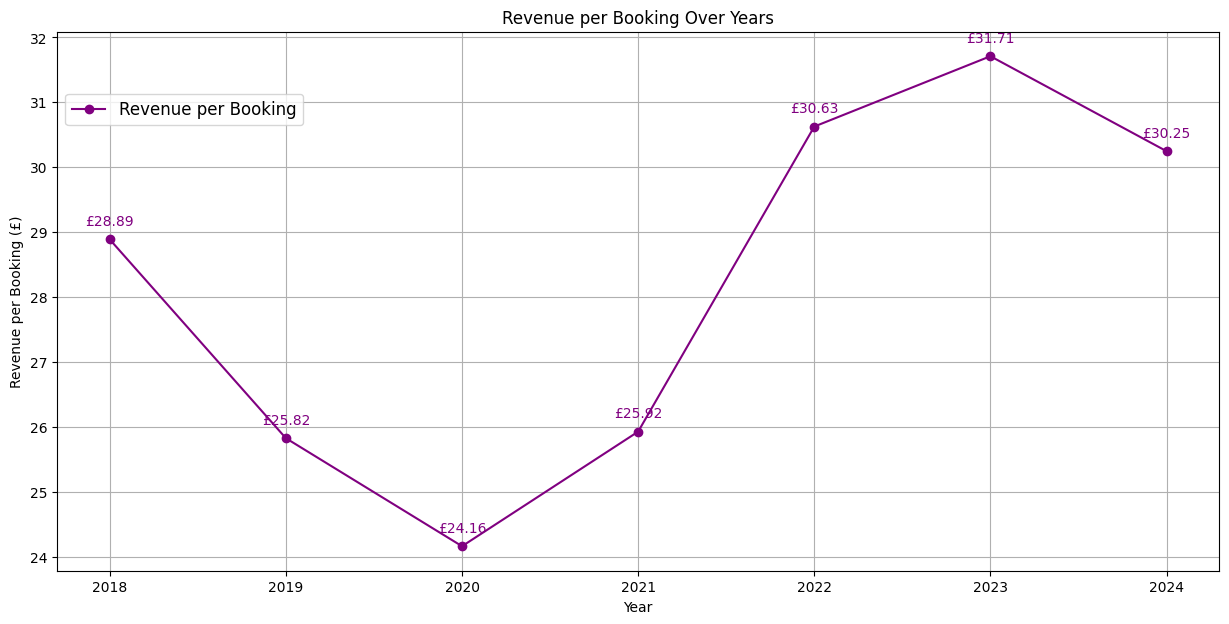

In [55]:
# Calculate revenue per booking
yearly_data['revenue_per_booking'] = yearly_data['total_revenue'] / yearly_data['total_bookings']

# Plotting revenue per booking
plt.figure(figsize=(15, 7))
line, = plt.plot(yearly_data['booking_billed_start_year'], yearly_data['revenue_per_booking'], color='purple', marker='o')
plt.xlabel('Year')
plt.ylabel('Revenue per Booking (£)')
plt.title('Revenue per Booking Over Years')

# Annotate with value
for i, txt in enumerate(yearly_data['revenue_per_booking']):
    plt.annotate(f'£{txt:.2f}', (yearly_data['booking_billed_start_year'][i], yearly_data['revenue_per_booking'][i]), textcoords="offset points", xytext=(0,10), ha='center', color='purple')

plt.grid(True)
plt.legend(handles=[line], labels=['Revenue per Booking'], loc='upper left', bbox_to_anchor=(0, 0.9), fontsize='large')
plt.show()

# 8. Additional Feature Engineering

Clean the "Vehicle Description" column of the dataset by removing words like "RETIRED," "WRITTEN OFF," extra spaces, and the '-' symbol. Do not remove rows containing "RETIRED" or "WRITTEN OFF," even though these vehicles are no longer part of the fleet. The goal of this project is to optimise prices using dynamic pricing, which relies on historical data. Deleting these rows would reduce the number of bookings and negatively impact the results.

In [56]:
import re

# Function to clean the vehicle_description column
def clean_vehicle_description(description):
    # Remove extra spaces
    description = re.sub(r'\s+', ' ', description)
    # Remove RETIRED and WRITTEN OFF
    description = description.replace('RETIRED', '')
    description = description.replace('WRITTEN OFF', '')
    description = description.replace('-', '')
    description = description.strip()

    return description

# Apply the function to the DataFrame
df['vehicle_description'] = df['vehicle_description'].apply(clean_vehicle_description)

In [57]:
df.head()

vehicle_description vehicle_registration  \
0             White Toyota Aygo XPlay Nav (NL66 NKZ)             NL66 NKZ   
1                          Renault Zoe EV (DL68 LNK)             DL68 LNK   
2  White Toyota Yaris Petrol Hybrid (Automatic)  ...             ND19 HWY   
3                 White Toyota Aygo XPlay (NL68 JVP)             NL68 JVP   
4  White Toyota Yaris Hybrid NJ68 JHV Automatic 5...             NJ68 JHV   

  location                            booking_id booking_actual_start  \
0  Bristol  fc59ba9c-2ce9-11ea-8efc-bfa292f04054  2020-01-01 23:06:00   
1  Bristol  1cf7fae6-2ce7-11ea-a970-fbf7b3786523  2020-01-01 22:46:00   
2  Newbury  591b7a98-2cd8-11ea-a341-71665a42c0e8  2020-01-01 21:29:00   
3  Swindon  b6177928-2c55-11ea-a2e0-e9685b57c653  2020-01-01 21:22:00   
4  Horsham  9ffdc790-27ba-11ea-a36d-c540c1997f03  2020-01-01 22:02:00   

    booking_actual_end  booking_actual_duration booking_billed_start  \
0  2020-01-02 01:24:00                    138.0  2020-01-01 23:00:00   
1  2020-01-02 02:01:00                    195.0  2020-01-01 22:45:00   
2  2020-01-01 23:28:00                    119.0  2020-01-01 21:30:00   
3  2020-01-01 21:38:00                     16.0  2020-01-01 21:15:00   
4  2020-01-02 19:50:00                    733.0  2020-01-01 20:30:00   

   booking_billed_start_hour  booking_billed_start_dayofweek  \
0                         23                               2   
1                         22                               2   
2                         21                               2   
3                         21                               2   
4                         20                               2   

   booking_billed_start_month  booking_billed_start_year   booking_billed_end  \
0                           1                       2020  2020-01-02 08:00:00   
1                           1                       2020  2020-01-02 02:30:00   
2                           1                       2020  2020-01-01 23:30:00   
3                           1                       2020  2020-01-01 21:45:00   
4                           1                       2020  2020-01-02 20:30:00   

   booking_billed_end_hour  booking_billed_end_dayofweek  \
0                        8                             3   
1                        2                             3   
2                       23                             2   
3                       21                             2   
4                       20                             3   

   booking_billed_end_month  booking_billed_end_year  booking_billed_duration  \
0                         1                     2020                    540.0   
1                         1                     2020                    225.0   
2                         1                     2020                    120.0   
3                         1                     2020                     30.0   
4                         1                     2020                    915.0   

   booking_mileage  booking_rates_hours  booking_rates_24hours  \
0             82.0                  0.0                    0.0   
1              5.0                  0.0                    0.0   
2              6.0                  2.0                    0.0   
3              6.0                  0.5                    0.0   
4             53.0                  0.0                    1.0   

   booking_rates_overnight  booking_actual_cost_distance  \
0                      1.0                         14.76   
1                      1.0                          0.00   
2                      0.0                          1.08   
3                      0.0                          1.08   
4                      0.0                          9.54   

   booking_actual_cost_time  booking_actual_cost_total   booking_created_at  \
0                      9.50                      24.26  2020-01-01 22:56:00   
1                     11.00                      11.00  2020-0

## 8.1. Weekend

In [58]:
df['is_weekend'] = df['booking_billed_start_dayofweek'].apply(lambda x: 1 if x in [5, 6] else 0)

## 8.2. Peak hours

After incorporating weekends, optimising prices requires focusing on peak hours. These peak hours are identified by grouping the data by hour and calculating the total number of bookings. Hours with booking numbers above the 75th percentile are designated as peak hours.

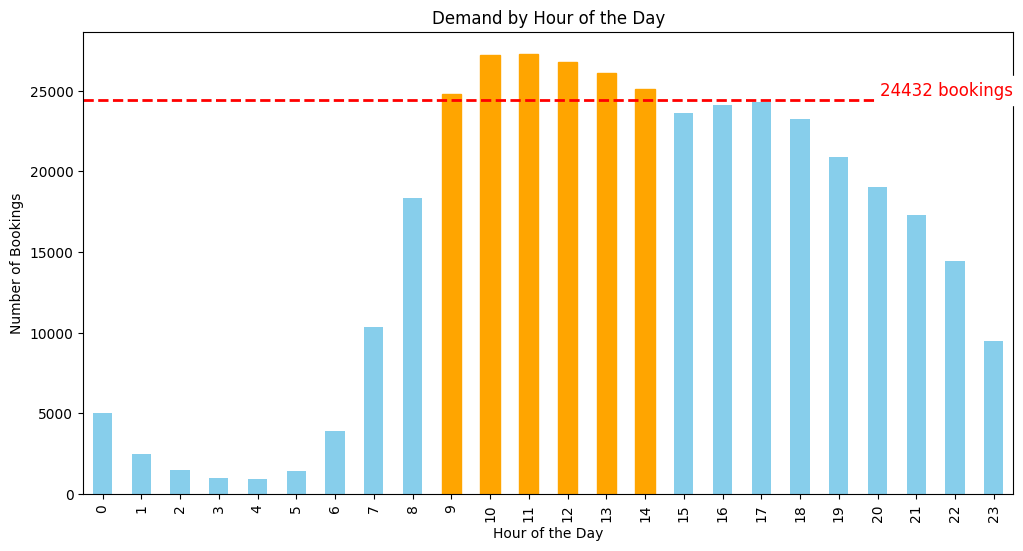

In [59]:
# Aggregate bookings by hour
hourly_bookings = df.groupby('booking_created_at_hour').size()
hourly_bookings = pd.DataFrame(hourly_bookings, columns=['bookings'])

# Identify peak hours
threshold = np.int32(np.round(np.percentile(hourly_bookings['bookings'], 75)))  # Example threshold for peak hours
peak_hours = hourly_bookings[hourly_bookings['bookings'] >= threshold].index.tolist()

# Plot hourly bookings
plt.figure(figsize=(12, 6))
bars = hourly_bookings['bookings'].plot(kind='bar', color='skyblue')

# Highlight peak hours
for hour in peak_hours:
    bars.patches[hour].set_color('orange')

# Add line for number of bookings above threshold
plt.axhline(y=threshold, color='red', linestyle='--', linewidth=2)
# Add text annotation
plt.text(x=23.5, y=threshold, s=f'{threshold} bookings', color='red', verticalalignment='bottom', horizontalalignment='right', fontsize=12, backgroundcolor='white')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bookings')
plt.title('Demand by Hour of the Day')
plt.show()

# add column for is_peak_hour
df['is_peak_hour'] = df['booking_created_at_hour'].apply(lambda x: 1 if x in peak_hours else 0)

In [60]:
df.head()

vehicle_description vehicle_registration  \
0             White Toyota Aygo XPlay Nav (NL66 NKZ)             NL66 NKZ   
1                          Renault Zoe EV (DL68 LNK)             DL68 LNK   
2  White Toyota Yaris Petrol Hybrid (Automatic)  ...             ND19 HWY   
3                 White Toyota Aygo XPlay (NL68 JVP)             NL68 JVP   
4  White Toyota Yaris Hybrid NJ68 JHV Automatic 5...             NJ68 JHV   

  location                            booking_id booking_actual_start  \
0  Bristol  fc59ba9c-2ce9-11ea-8efc-bfa292f04054  2020-01-01 23:06:00   
1  Bristol  1cf7fae6-2ce7-11ea-a970-fbf7b3786523  2020-01-01 22:46:00   
2  Newbury  591b7a98-2cd8-11ea-a341-71665a42c0e8  2020-01-01 21:29:00   
3  Swindon  b6177928-2c55-11ea-a2e0-e9685b57c653  2020-01-01 21:22:00   
4  Horsham  9ffdc790-27ba-11ea-a36d-c540c1997f03  2020-01-01 22:02:00   

    booking_actual_end  booking_actual_duration booking_billed_start  \
0  2020-01-02 01:24:00                    138.0  2020-01-01 23:00:00   
1  2020-01-02 02:01:00                    195.0  2020-01-01 22:45:00   
2  2020-01-01 23:28:00                    119.0  2020-01-01 21:30:00   
3  2020-01-01 21:38:00                     16.0  2020-01-01 21:15:00   
4  2020-01-02 19:50:00                    733.0  2020-01-01 20:30:00   

   booking_billed_start_hour  booking_billed_start_dayofweek  \
0                         23                               2   
1                         22                               2   
2                         21                               2   
3                         21                               2   
4                         20                               2   

   booking_billed_start_month  booking_billed_start_year   booking_billed_end  \
0                           1                       2020  2020-01-02 08:00:00   
1                           1                       2020  2020-01-02 02:30:00   
2                           1                       2020  2020-01-01 23:30:00   
3                           1                       2020  2020-01-01 21:45:00   
4                           1                       2020  2020-01-02 20:30:00   

   booking_billed_end_hour  booking_billed_end_dayofweek  \
0                        8                             3   
1                        2                             3   
2                       23                             2   
3                       21                             2   
4                       20                             3   

   booking_billed_end_month  booking_billed_end_year  booking_billed_duration  \
0                         1                     2020                    540.0   
1                         1                     2020                    225.0   
2                         1                     2020                    120.0   
3                         1                     2020                     30.0   
4                         1                     2020                    915.0   

   booking_mileage  booking_rates_hours  booking_rates_24hours  \
0             82.0                  0.0                    0.0   
1              5.0                  0.0                    0.0   
2              6.0                  2.0                    0.0   
3              6.0                  0.5                    0.0   
4             53.0                  0.0                    1.0   

   booking_rates_overnight  booking_actual_cost_distance  \
0                      1.0                         14.76   
1                      1.0                          0.00   
2                      0.0                          1.08   
3                      0.0                          1.08   
4                      0.0                          9.54   

   booking_actual_cost_time  booking_actual_cost_total   booking_created_at  \
0                      9.50                      24.26  2020-01-01 22:56:00   
1                     11.00                      11.00  2020-0

# 9. Feature Normalisation

## 9.1. Skewness

In the below output, the skewness value of numerical features are greater than 1, which shows that it's positive skewness. This positive skewness value indicates that the distribution of these features are right-skewed, meaning that the right tail (higher values) is longer or fatter than the left tail. This suggests that there are more occurrences of smaller values, with a few larger values pulling the mean to the right.

In [61]:
# Calculate skewness for numerical features
numerical_features = ['booking_actual_duration', 'booking_billed_duration', 'booking_mileage',
                      'booking_actual_cost_distance', 'booking_actual_cost_time',
                      'booking_actual_cost_total']
skewness = df[numerical_features].skew()
print("Skewness:\n")
print(skewness)

Skewness:

booking_actual_duration         1.128238
booking_billed_duration         1.140119
booking_mileage                 1.179746
booking_actual_cost_distance    1.163278
booking_actual_cost_time        1.090684
booking_actual_cost_total       1.114167
dtype: float64


## 9.2. Histogram of Numerical Features

The distribution of these features are right-skewed with a long tail extending towards higher values.
1. 'booking_actual_duration': There is a noticeable spike around the 700 unit mark, indicating a significant number of bookings with that duration.
2. 'booking_billed_duration': There are periodic spikes at regular intervals, which might suggest a billing policy or tiered duration structure. A significant spike is present around the 900 unit mark.
3. 'booking_mileage': The distribution is heavily skewed to the right, with most bookings having mileage below 50 units. There is a notable spike around the 100 unit mark.
4. 'booking_actual_cost_distance': Most bookings have a distance cost of less than 2 units. There is a sharp increase at around 16 units, likely indicating outliers or a cap on the cost distance.
5. 'booking_actual_cost_time': The cost related to booking time mostly falls below 20 units. There are spikes at intervals (e.g., 20, 40, 60 units), which could be due to specific pricing brackets or tiers.
6. 'booking_actual_cost_total': The total actual cost is predominantly below 20 units. A substantial spike is observed at around 80 units, possibly indicating an outlier or a maximum cost limit.

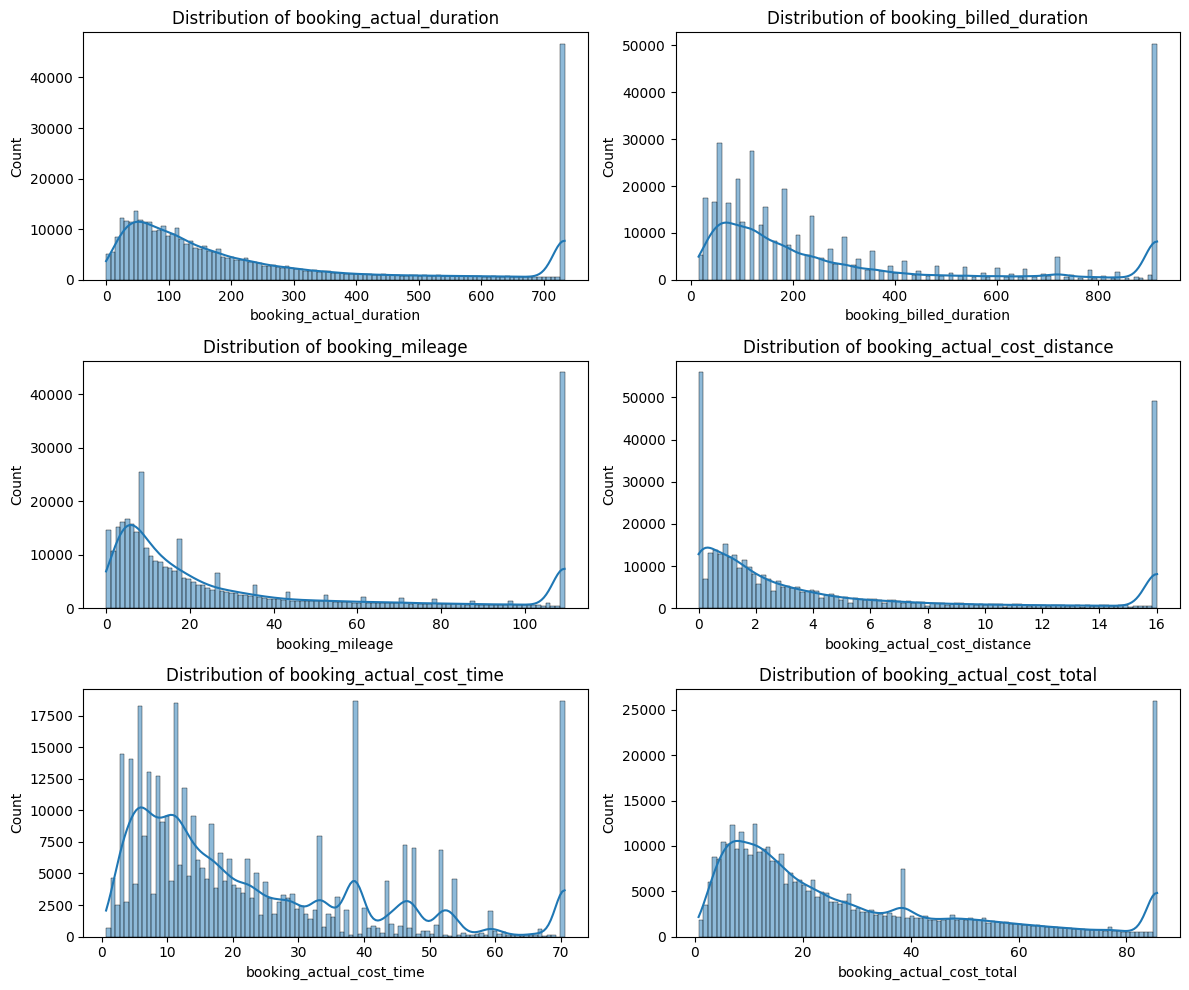

In [62]:
# Plot histograms for these features
df_log_transformed = df.copy()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
for i, feature in enumerate(numerical_features):
    sns.histplot(df_log_transformed[feature], kde=True, ax=axes[i//2, i%2]).set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

## 9.3. Transformation of Numerical features

In [63]:
# Log transformation
for col in numerical_features:
    df_log_transformed[col] = np.log1p(df_log_transformed[col])

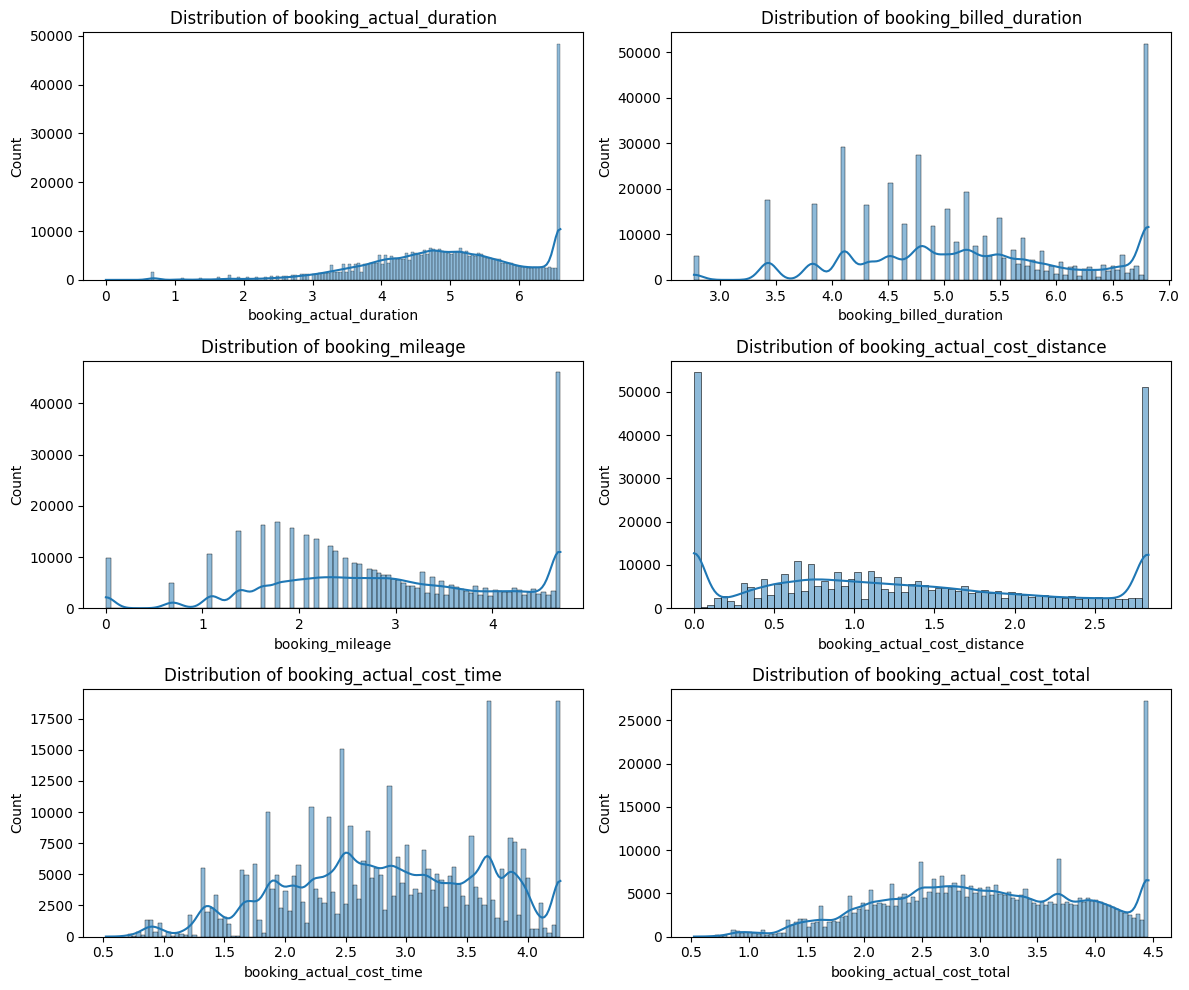

In [64]:
# Plot histograms for these features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
for i, feature in enumerate(numerical_features):
    sns.histplot(df_log_transformed[feature], kde=True, ax=axes[i//2, i%2]).set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [65]:
df_log_transformed.head()

vehicle_description vehicle_registration  \
0             White Toyota Aygo XPlay Nav (NL66 NKZ)             NL66 NKZ   
1                          Renault Zoe EV (DL68 LNK)             DL68 LNK   
2  White Toyota Yaris Petrol Hybrid (Automatic)  ...             ND19 HWY   
3                 White Toyota Aygo XPlay (NL68 JVP)             NL68 JVP   
4  White Toyota Yaris Hybrid NJ68 JHV Automatic 5...             NJ68 JHV   

  location                            booking_id booking_actual_start  \
0  Bristol  fc59ba9c-2ce9-11ea-8efc-bfa292f04054  2020-01-01 23:06:00   
1  Bristol  1cf7fae6-2ce7-11ea-a970-fbf7b3786523  2020-01-01 22:46:00   
2  Newbury  591b7a98-2cd8-11ea-a341-71665a42c0e8  2020-01-01 21:29:00   
3  Swindon  b6177928-2c55-11ea-a2e0-e9685b57c653  2020-01-01 21:22:00   
4  Horsham  9ffdc790-27ba-11ea-a36d-c540c1997f03  2020-01-01 22:02:00   

    booking_actual_end  booking_actual_duration booking_billed_start  \
0  2020-01-02 01:24:00                 4.934474  2020-01-01 23:00:00   
1  2020-01-02 02:01:00                 5.278115  2020-01-01 22:45:00   
2  2020-01-01 23:28:00                 4.787492  2020-01-01 21:30:00   
3  2020-01-01 21:38:00                 2.833213  2020-01-01 21:15:00   
4  2020-01-02 19:50:00                 6.598509  2020-01-01 20:30:00   

   booking_billed_start_hour  booking_billed_start_dayofweek  \
0                         23                               2   
1                         22                               2   
2                         21                               2   
3                         21                               2   
4                         20                               2   

   booking_billed_start_month  booking_billed_start_year   booking_billed_end  \
0                           1                       2020  2020-01-02 08:00:00   
1                           1                       2020  2020-01-02 02:30:00   
2                           1                       2020  2020-01-01 23:30:00   
3                           1                       2020  2020-01-01 21:45:00   
4                           1                       2020  2020-01-02 20:30:00   

   booking_billed_end_hour  booking_billed_end_dayofweek  \
0                        8                             3   
1                        2                             3   
2                       23                             2   
3                       21                             2   
4                       20                             3   

   booking_billed_end_month  booking_billed_end_year  booking_billed_duration  \
0                         1                     2020                 6.293419   
1                         1                     2020                 5.420535   
2                         1                     2020                 4.795791   
3                         1                     2020                 3.433987   
4                         1                     2020                 6.820016   

   booking_mileage  booking_rates_hours  booking_rates_24hours  \
0         4.418841                  0.0                    0.0   
1         1.791759                  0.0                    0.0   
2         1.945910                  2.0                    0.0   
3         1.945910                  0.5                    0.0   
4         3.988984                  0.0                    1.0   

   booking_rates_overnight  booking_actual_cost_distance  \
0                      1.0                      2.757475   
1                      1.0                      0.000000   
2                      0.0                      0.732368   
3                      0.0                      0.732368   
4                      0.0                      2.355178   

   booking_actual_cost_time  booking_actual_cost_total   booking_created_at  \
0                  2.351375                   3.229222  2020-01-01 22:56:00   
1                  2.484907                   2.484907  2020-0

# 10. Feature Encoding

In [66]:
categorical_features = ['location', 'season', 'is_holiday', 'is_peak_hour', 'is_weekend', 'Vehicle Type', 'Fuel Type']

# Use Binary encoding for location
# Binary Encoding for 'location' due to high cardinality
binary_encoder = BinaryEncoder(cols=categorical_features[0])
locations = binary_encoder.fit_transform(df_log_transformed[categorical_features[0]])

# Use One-Hot encoding for season, is_holiday, is_peak_hour, is_weekend, Vehicle Type, and Fuel Type
# One-Hot Encoding for other categorical features
one_hot_encoder = OneHotEncoder(cols=categorical_features[1::], use_cat_names=True)
other_features = one_hot_encoder.fit_transform(df_log_transformed[categorical_features[1::]])

df = pd.concat([df_log_transformed, locations, other_features], axis=1)

In [67]:
df.drop(categorical_features, axis=1, inplace=True)
df.shape

(378614, 57)

In [68]:
new_order = ['vehicle_description', 'vehicle_registration',	'location_0', 'location_1', 'location_2', 'location_3', 'location_4', 'location_5', 'location_6',
             'booking_id', 'booking_actual_start', 'booking_actual_end', 'booking_actual_duration', 'booking_billed_start', 'booking_billed_start_hour',
             'booking_billed_start_dayofweek', 'booking_billed_start_month', 'booking_billed_start_year', 'booking_billed_end', 'booking_billed_end_hour',
             'booking_billed_end_dayofweek', 'booking_billed_end_month', 'booking_billed_end_year', 'booking_billed_duration', 'booking_mileage',
             'booking_rates_hours', 'booking_rates_24hours', 'booking_rates_overnight', 'booking_actual_cost_distance', 'booking_actual_cost_time',
             'booking_actual_cost_total', 'booking_created_at',	'booking_created_at_hour', 'booking_created_at_dayofweek', 'booking_created_at_month',
             'booking_created_at_year', 'season_Winter', 'season_Autumn', 'season_Summer', 'season_Spring', 'is_holiday_1.0', 'is_holiday_0.0',
             'Vehicle Type_City', 'Vehicle Type_Everyday', 'Vehicle Type_Family', 'Vehicle Type_Van', 'Vehicle Type_7 Seater', 'Fuel Type_Petrol',
             'Fuel Type_EV', 'Fuel Type_Hydrogen', 'is_peak_hour_1.0', 'is_peak_hour_0.0', 'is_weekend_1.0', 'is_weekend_0.0', 'hourly_rate',
             'daily_rate', 'per_mile']

df = df[new_order]
df.shape

(378614, 57)

In [69]:
df.head()

vehicle_description vehicle_registration  \
0             White Toyota Aygo XPlay Nav (NL66 NKZ)             NL66 NKZ   
1                          Renault Zoe EV (DL68 LNK)             DL68 LNK   
2  White Toyota Yaris Petrol Hybrid (Automatic)  ...             ND19 HWY   
3                 White Toyota Aygo XPlay (NL68 JVP)             NL68 JVP   
4  White Toyota Yaris Hybrid NJ68 JHV Automatic 5...             NJ68 JHV   

   location_0  location_1  location_2  location_3  location_4  location_5  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           1   
3           0           0           0           0           0           1   
4           0           0           0           0           1           0   

   location_6                            booking_id booking_actual_start  \
0           1  fc59ba9c-2ce9-11ea-8efc-bfa292f04054  2020-01-01 23:06:00   
1           1  1cf7fae6-2ce7-11ea-a970-fbf7b3786523  2020-01-01 22:46:00   
2           0  591b7a98-2cd8-11ea-a341-71665a42c0e8  2020-01-01 21:29:00   
3           1  b6177928-2c55-11ea-a2e0-e9685b57c653  2020-01-01 21:22:00   
4           0  9ffdc790-27ba-11ea-a36d-c540c1997f03  2020-01-01 22:02:00   

    booking_actual_end  booking_actual_duration booking_billed_start  \
0  2020-01-02 01:24:00                 4.934474  2020-01-01 23:00:00   
1  2020-01-02 02:01:00                 5.278115  2020-01-01 22:45:00   
2  2020-01-01 23:28:00                 4.787492  2020-01-01 21:30:00   
3  2020-01-01 21:38:00                 2.833213  2020-01-01 21:15:00   
4  2020-01-02 19:50:00                 6.598509  2020-01-01 20:30:00   

   booking_billed_start_hour  booking_billed_start_dayofweek  \
0                         23                               2   
1                         22                               2   
2                         21                               2   
3                         21                               2   
4                         20                               2   

   booking_billed_start_month  booking_billed_start_year   booking_billed_end  \
0                           1                       2020  2020-01-02 08:00:00   
1                           1                       2020  2020-01-02 02:30:00   
2                           1                       2020  2020-01-01 23:30:00   
3                           1                       2020  2020-01-01 21:45:00   
4                           1                       2020  2020-01-02 20:30:00   

   booking_billed_end_hour  booking_billed_end_dayofweek  \
0                        8                             3   
1                        2                             3   
2                       23                             2   
3                       21                             2   
4                       20                             3   

   booking_billed_end_month  booking_billed_end_year  booking_billed_duration  \
0                         1                     2020                 6.293419   
1                         1                     2020                 5.420535   
2                         1                     2020                 4.795791   
3                         1                     2020                 3.433987   
4                         1                     2020                 6.820016   

   booking_mileage  booking_rates_hours  booking_rates_24hours  \
0         4.418841                  0.0                    0.0   
1         1.791759                  0.0                    0.0   
2         1.945910                  2.0                    0.0   
3         1.945910                  0.5                    0.0   
4         3.988984                  0.0                    1.0   

   booking_rates_overnight  booking_actual_cost_distance  \
0                      1.0              

In [70]:
df_log_transformed.to_csv(DATA_PATH + 'transformed_dataset.csv', index=False)
df.to_csv(DATA_PATH + 'scaled_dataset.csv', index=False)

In [71]:
# Encoders location
ENCODERS_PATH = "/content/drive/MyDrive/MSc Dissertation/encoders/"

# Save the encoders
joblib.dump(binary_encoder, ENCODERS_PATH + 'binary_encoder.pkl')
joblib.dump(one_hot_encoder, ENCODERS_PATH + 'one_hot_encoder.pkl')

['/content/drive/MyDrive/MSc Dissertation/encoders/one_hot_encoder.pkl']

---